## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

# import libraries for data manipulation
import numpy as np
import pandas as pd


# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=42

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [ ]:
# Load the dataset from my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data into a pandas dataframe
loan_modelling_orig = pd.read_csv("/content/drive/MyDrive/AIML/Project2 Personal Loan/Loan_Modelling.csv")

In [ ]:
# creating a copy of the data
data = loan_modelling_orig.copy()

## Data Overview

* Observations
* Sanity checks

### Viewing the first and last 5 rows of the dataset

In [ ]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Checking the shape of the dataset.

In [ ]:
data.shape

(5000, 14)

- The dataset has 5000 rows and 14 columns.

### Checking the attribute types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




* There are 14 numerical and 0 cetegorical variables in the data




### Checking the statistical summary

In [ ]:
data.describe(include="all").T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

*   The Mean and Median age are both at or around 45 years which

*   The min value for Experience is (-3) which is impossible. This warrants futher analysis and a count of values less than zero. Most likely they will be flipped to positive values or zero.

*   Median income is \$64k however with mean income just under \$74k this is a right-skewed distribution which makes sense being that there is a logical floor of 0 and potentially limitless income levels.

*   Fewer than 50% of customers have a mortgage
*   Fewer than 50% of customers have a credit card by another other bank.

*   Fewer than 75% have a personal loan
*   Fewer than 75% have a CD
*   Fewer than 75% have a securities account.

*   At least 50% use online banking.

*   All have complete a bachelors degree
*   At least 50% have earned a masters degree
*   At least 75% earning an advanced or professional degree

*   At least 25% are single
*   At least 50% either married or single parent
*   At least 75% being married with children.

*   The mean spending on credit cards is \$1937.94 however, the standard deviation is \$1747.66 which is 90% of the mean.





### Analyze Experience Values < 0

In [ ]:
# Filter for negative 'Experience' values
negative_experience_values = data['Experience'][data['Experience'] < 0]

# Get the total number of occurrences of each negative value
negative_experience_counts = negative_experience_values.value_counts()

# Display the result
print(negative_experience_counts)

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64


### Clean Experience Values < 0
NOTE: This was only done on the 'data' copy, not the original .csv

In [ ]:
# Convert negative values in 'Experience' to positive
data['Experience'] = data['Experience'].abs()

# Verify the changes
print(data['Experience'])
data.describe(include="all").T

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64


count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.134600    11.415189      0.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Check for missing values

In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

*    There are no missing values

### Check for duplicate values

In [ ]:
data.duplicated().sum()

np.int64(0)

*   There are no duplicate values

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
*   The analysis notes a large group of non-mortgage holders (69.2%, possibly renters or fully paid homeowners) and a small segment of 291 high-value mortgage customers (outliers over $252.5k) accounting for nearly 58% of mortgage exposure. This indicates a right-skewed distribution with significant outliers.

2. How many customers have credit cards?
*   Approximately 97.8% of customers (4,894) have a credit card, with 68.4% likely using an AllLife Bank credit card (100% - 29.4% non-AllLife + 2.2% with $0 balance).

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
*   Strong correlations include Personal_Loan with Income (0.50), CCAvg (0.37), CD_Account (0.32), Education (0.14), and Mortgage (0.14), indicating these are key drivers.

4. How does a customer's interest in purchasing a loan vary with their age?

*  The analysis indicates variation with age is near zero (-0.01), uniformly distributed, and highly correlated with Experience (0.99). The pairplot inference suggests no strong differentiation by age alone, perhaps segmentation will provide some multi-variable relationship wherein age will be a factor.

5. How does a customer's interest in purchasing a loan vary with their education?

*   There is a slight tendency for personal loan customers to have higher Education levels (2 or 3), consistent with the 0.14 correlation, suggesting advanced education may increase loan interest.

### Univariate Analysis

**Group variables by type of data into tuples for more efficient analysis**

In [ ]:
# Separate columns into continuous/numerical variables and categorical/ordinal/dichotomous

# Continuous data analysis
continuous_vars = ('Income', 'Age', 'Experience', 'CCAvg', 'Mortgage')

# Categorical data analysis
categorical_vars = ('ZIPCode')

# Binary categorical data analysis
binary_vars = ('Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard')

**Visualize and analyze the distribution of continuous variables**

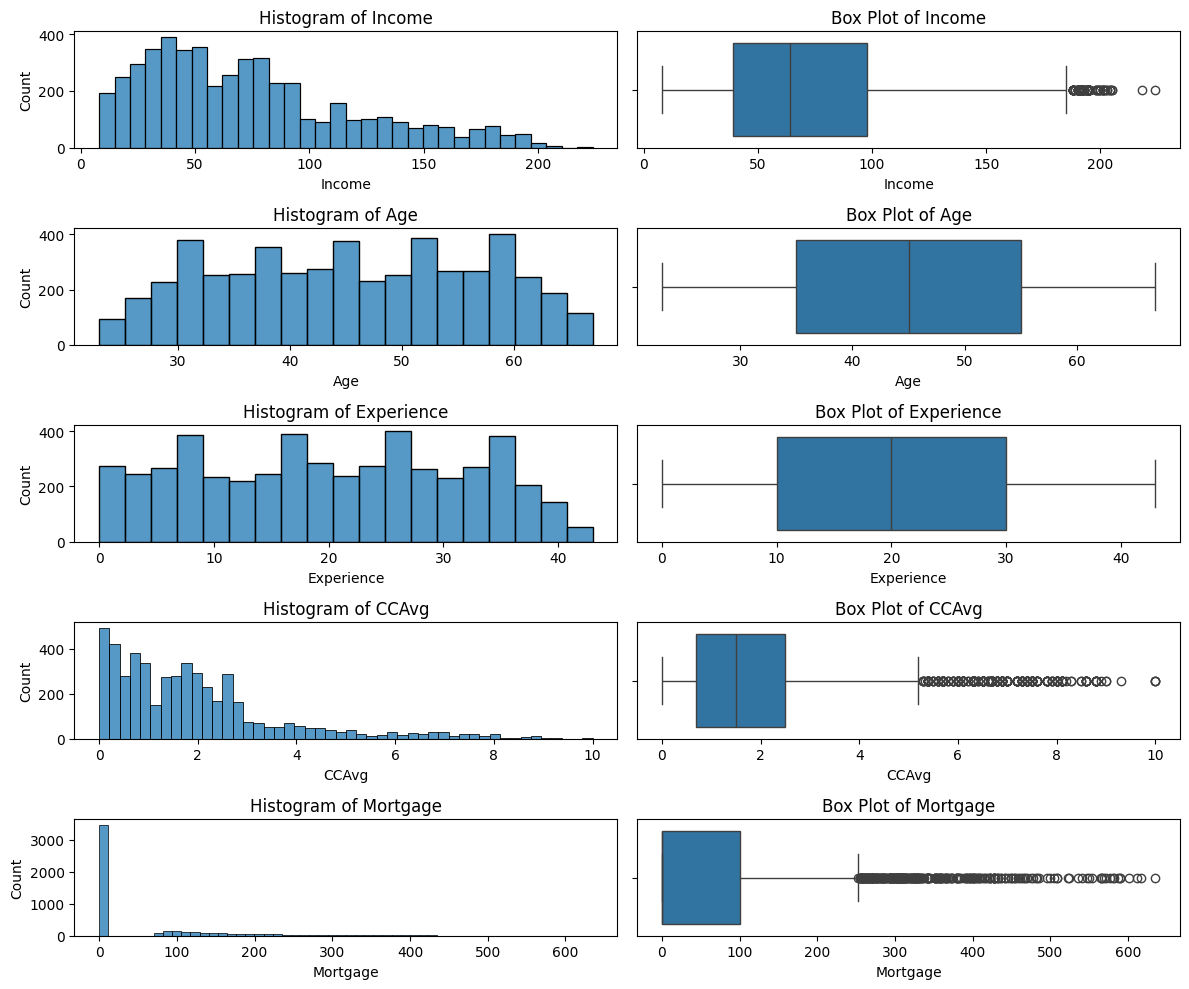

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

# Iterate over the continuous variables
for i, feature in enumerate(continuous_vars):
    # Historgram
    plt.subplot(len(continuous_vars), 2, 2*i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram
    plt.title(f'Histogram of {feature}')  # add a title
    # Box Plot
    plt.subplot(len(continuous_vars), 2, 2*i+2)  # assign subplot for box plot
    sns.boxplot(data=data, x=feature)    # plot the boxplot
    plt.title(f'Box Plot of {feature}')  # add a title

plt.tight_layout();   # to add spacing between plots
plt.show()

**Investigate Income, CCAvg, and Mortgage Outliers**

In [ ]:
# 'Income'
print('-INCOME-')
# perform calculations on 'Income' outliers
upper_whisker_inc = data['Income'].quantile(0.75) + (1.5*(data['Income'].quantile(0.75) - data['Income'].quantile(0.25)))
print('Income upper_whisker ==', upper_whisker_inc)

# create dataframes for high and non-high income customers
high_income_customers = data['Income'][data['Income'] > upper_whisker_inc]
not_high_income_customers = data['Income'][data['Income'] <= upper_whisker_inc]

# count the number of customers income above upper_whisker
print('number of high income customers (above upper_whisker) ==',len(high_income_customers))

# calculate income data
print('total income of high income customers ==', high_income_customers.sum())
print('total income of non-high income customers ==', not_high_income_customers.sum())
print('percent of total income from high income customers', 100*(high_income_customers.sum()/not_high_income_customers.sum()))
print('\n')

# 'CCAvg'
print('-CCAvg-')
# perform calculations on 'CCAvg' outliers
upper_whisker_cc = data['CCAvg'].quantile(0.75) + (1.5*(data['CCAvg'].quantile(0.75) - data['CCAvg'].quantile(0.25)))
print('CCAvg upper_whisker ==', upper_whisker_cc)

# create dataframes for high and non-high CCAvg customers
high_cc_customers = data['CCAvg'][data['CCAvg'] > upper_whisker_cc]
not_high_cc_customers = data['CCAvg'][data['CCAvg'] <= upper_whisker_cc]
zero_cc_customers = data['CCAvg'][data['CCAvg'] == 0]

# count the number of customers CCAvg above upper_whisker
print('number of high cc customers (above upper_whisker) ==',len(high_cc_customers))

# calculate CCAvg data
print('number of customers with CC ==',(data.shape[0] - len(zero_cc_customers)))
print('number of customers with no CC ==', len(zero_cc_customers))
print('percent of customers with zero CC ==', 100*(len(zero_cc_customers)/data.shape[0]))
print('total credit spending of high CCAvg customers ==', high_cc_customers.sum())
print('total credit spending of non-high CCAvg customers ==', not_high_cc_customers.sum())
print('percent of total credit spending from high CCAvg customers ==', 100*(high_cc_customers.sum()/not_high_cc_customers.sum()))

print('\n')

# 'Mortgage'
print('-MORTGAGE-')
# perform calculations on 'Mortgage' outliers
upper_whisker_mort = data['Mortgage'].quantile(0.75) + (1.5*(data['Mortgage'].quantile(0.75) - data['Mortgage'].quantile(0.25)))
print('Mortgage upper_whisker ==', upper_whisker_mort)

# create dataframes for high, non-high, and zero Mortgage customers
high_mort_customers = data['Mortgage'][data['Mortgage'] > upper_whisker_mort]
not_high_mort_customers = data['Mortgage'][data['Mortgage'] <= upper_whisker_mort]
zero_mort_customers = data['Mortgage'][data['Mortgage'] == 0]

# count the number of customers Mortgage above upper_whisker
print('number of high Mortgage customers (above upper_whisker) ==',len(high_mort_customers))

# count the number of customers Mortgage equal to zero
print('number of customers without a mortgage ==',len(zero_mort_customers))

# calculate Mortgage data
print('total Mortgage balances of high Mortgage customers ==', high_mort_customers.sum())
print('total Mortgage balances of non-high Mortgage customers ==', not_high_mort_customers.sum())
print('percent of total Mortgage balances from high Mortgage customers ==', 100*(high_mort_customers.sum()/not_high_mort_customers.sum()))
print('percent of customers with zero Mortgage ==', 100*(len(zero_mort_customers)/data.shape[0]))


-INCOME-
Income upper_whisker == 186.5
number of high income customers (above upper_whisker) == 96
total income of high income customers == 18688
total income of non-high income customers == 350183
percent of total income from high income customers 5.336638271989217


-CCAvg-
CCAvg upper_whisker == 5.2
number of high cc customers (above upper_whisker) == 324
number of customers with CC == 4894
number of customers with no CC == 106
percent of customers with zero CC == 2.12
total credit spending of high CCAvg customers == 2217.8
total credit spending of non-high CCAvg customers == 7471.889999999999
percent of total credit spending from high CCAvg customers == 29.681914482145753


-MORTGAGE-
Mortgage upper_whisker == 252.5
number of high Mortgage customers (above upper_whisker) == 291
number of customers without a mortgage == 3462
total Mortgage balances of high Mortgage customers == 103498
total Mortgage balances of non-high Mortgage customers == 178996
percent of total Mortgage balances

*   Income is right-skewed with most customers earning between \$30k–\$100k and 96 customers have income above the upper whisker value of \$186.5k. They account for less than 2% of customers and 5.3% of all customer income. Scaling will definitely be required to nullify the effects of high income customers on clustering.

*   Age is fairly uniformly distributed from ~25 to ~65. No obvious skew.

*   Experience is fairly uniform with small dips and is consistent with Age. Might be correlated with Age. Need to watch for multicollinearity.

*   CCAvg is strongly right-skewed. 4894 or 97.8% of people have a CC. Most people spend under \$2k/month. A few spend up to \$10k but this presents a long right whisker, and nearly 6.5% of the total number of customers are outliers accounting for nearly 23% of all CC spending. This skew could heavily influence clustering or tree splits and will need to be addressed with scaling.

*   There is a large group of non-mortgage holders 69.2% (possibly renters or fully paid homeowners) and a small segment of 291 high-value mortgage customers (considered outliers over \$252.5k) that are responsible for nearly 58% mortgage exposure. This group may warrant special attention or segmentation for marketing, risk, or retention strategies.

**Analyze ZIPcode**

    ZIPCode  total_customers  percent_of_customers
0     94720              169                  3.38
1     94305              127                  2.54
2     95616              116                  2.32
3     90095               71                  1.42
4     93106               57                  1.14
6     92037               54                  1.08
5     93943               54                  1.08
7     91320               53                  1.06
8     91711               52                  1.04
9     94025               52                  1.04
10    92093               51                  1.02
12    90245               50                  1.00
11    90024               50                  1.00
14    90089               46                  0.92
13    91330               46                  0.92
15    92121               45                  0.90
16    94304               45                  0.90
17    94143               37                  0.74
18    95051               34   

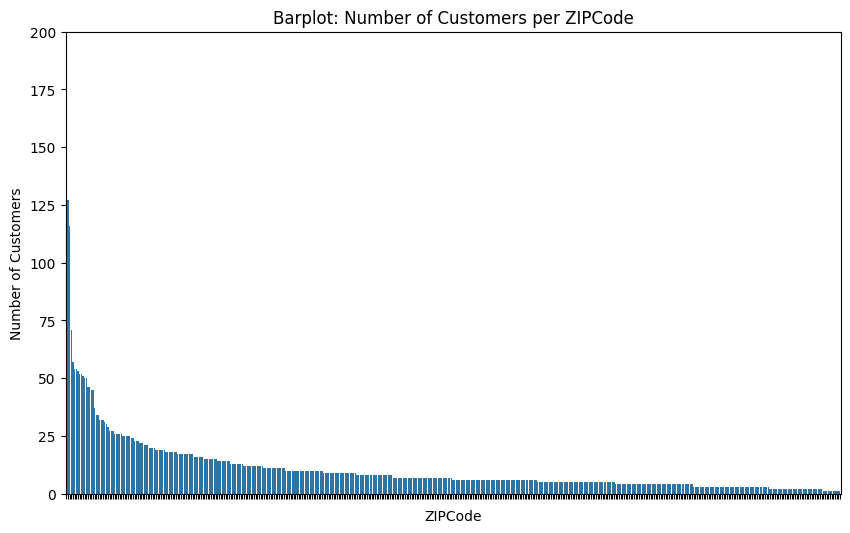

In [ ]:
ZIPCode_counts = data['ZIPCode'].value_counts()

ZIPCode_summary = pd.DataFrame({
    'ZIPCode': ZIPCode_counts.index,
    'total_customers': ZIPCode_counts.values,
    'percent_of_customers': (ZIPCode_counts.values / data.shape[0]*100).round(2)
})
# Sort the DataFrame by 'total_customers' in descending order
ZIPCode_summary = ZIPCode_summary.sort_values(by='total_customers', ascending=False)

print(ZIPCode_summary.head(20))

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Barplot: Number of Customers per ZIPCode')
plt.ylim(0, 200)
plt.xlabel('ZIPCode')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(len(ZIPCode_summary)), labels=[''] * len(ZIPCode_summary))
sns.barplot(x='ZIPCode', y='total_customers', data=ZIPCode_summary, order=ZIPCode_summary['ZIPCode'])
plt.show()



*   The top 12 ZIPCodes each account for at least 1% of the customer base and total 19.12% of all customers.
*   Without a geospatial information system we cannot map the distribution however, this would be a useful analysis - to examine the spatial relationships in a way that categorical analysis by ZIPCode cannot accomplish.
*   I attempted to install uszipcode but was unable to install.
*   I also attempted to groupby ZIPCode and analyze data however, with so many zip codes it became an overwhelming project unto itself

**Analyze Binary Variables**

In [ ]:
# Create an empty list to store the summary for each binary variable
bin_summary_list = []

# Loop over each binary variable to calculate sums and percentages
for var in binary_vars:
    counts = data[var].value_counts()  # Get the counts of 0s and 1s
    total = len(data[var])  # Total number of entries in the column
    bin_summary_list.append({
        'Variable': var,
        'Sum of 0s': counts.get(0, 0),  # Defaulting to 0 if not present
        'Sum of 1s': counts.get(1, 0),  # Defaulting to 0 if not present
        'Percentage of 0s': (counts.get(0, 0) / total * 100),
        'Percentage of 1s': (counts.get(1, 0) / total * 100)
    })

# Convert the list of dictionaries into a DataFrame
bin_summary_df = pd.DataFrame(bin_summary_list)

# Display the summary DataFrame
bin_summary_df.head()

Variable  Sum of 0s  Sum of 1s  Percentage of 0s  \
0       Personal_Loan       4520        480             90.40   
1  Securities_Account       4478        522             89.56   
2          CD_Account       4698        302             93.96   
3              Online       2016       2984             40.32   
4          CreditCard       3530       1470             70.60   

   Percentage of 1s  
0              9.60  
1             10.44  
2              6.04  
3             59.68  
4             29.40

*   Online banking usage is just under 60%. Without further context or industry averages we cannot presume much about this at this time.
*   CD and Securities Accounts each have low usage.
*   Non-AllLife Bank credit card usage is 29.4% which, combined with the 2.2% of customers with a \$0-average credit card balance is indicative of at least 68.4% of customers having a credit card with AllLife Bank, i.e. (100 - (29.4 + 2.2))

### Bivariate Analysis

**Heatmap**

<Axes: >

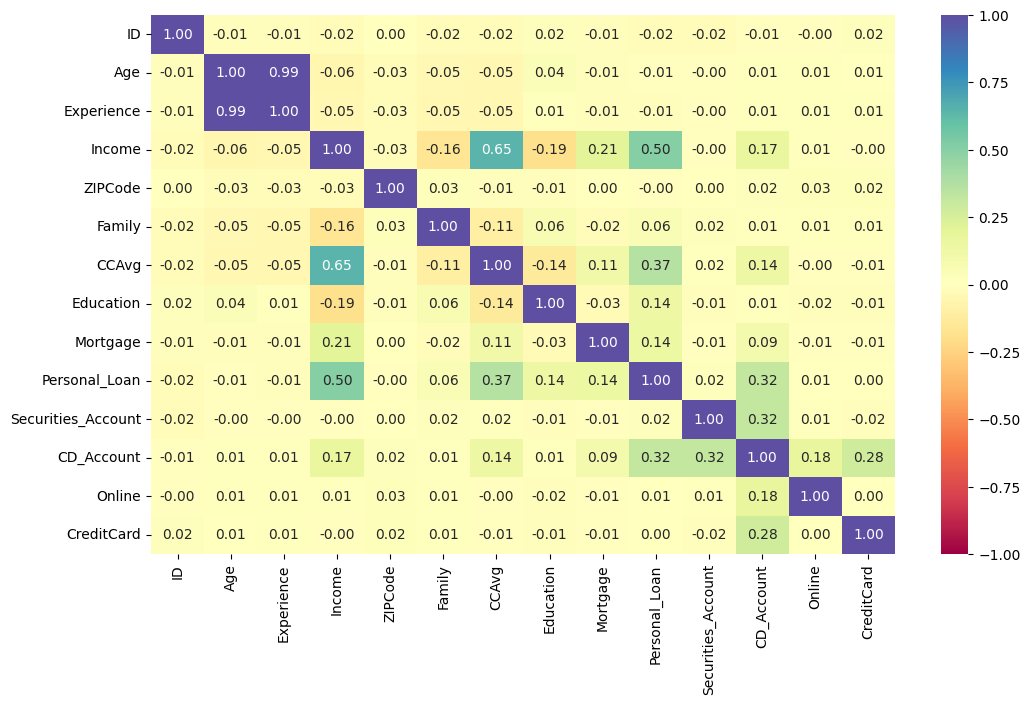

In [ ]:
# defining the size of the plot
plt.figure(figsize=(12, 7))

# plotting the heatmap for correlation
sns.heatmap(
    data.corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

Notable Personal Loan Correlations:
*   Personal_Loan and Income (0.50)
*   Personal_Loan and CCAvg (0.37)
*   Personal_Loan and CD_Account (0.32)
*   Personal_Loan and Education (0.14)
*   Personal_Loan and Mortgage (0.14)

Other Strong positive correlations:
*   Age and Experience (0.99)
*   Income and CCAvg (0.65)
*   CD_Account and Securities_Account (0.32)
*   CD_Account and CreditCard (0.28)

Other Negative correlations:
*   Income and Education (-0.19)
*   Income and Family (-0.16)
*   CCAvg adn Education (-0.14)

Notable Low/No-Correlations:
*   Personal_Loan and Securities_Account (0.02)

Based on this, it would appear that customers with higher income, higher credit card spending, existing CD accounts, advanced education, and mortgages are more likely to accept personal loans. We should continue bivariate analysis across those variables.

**Pairplot**

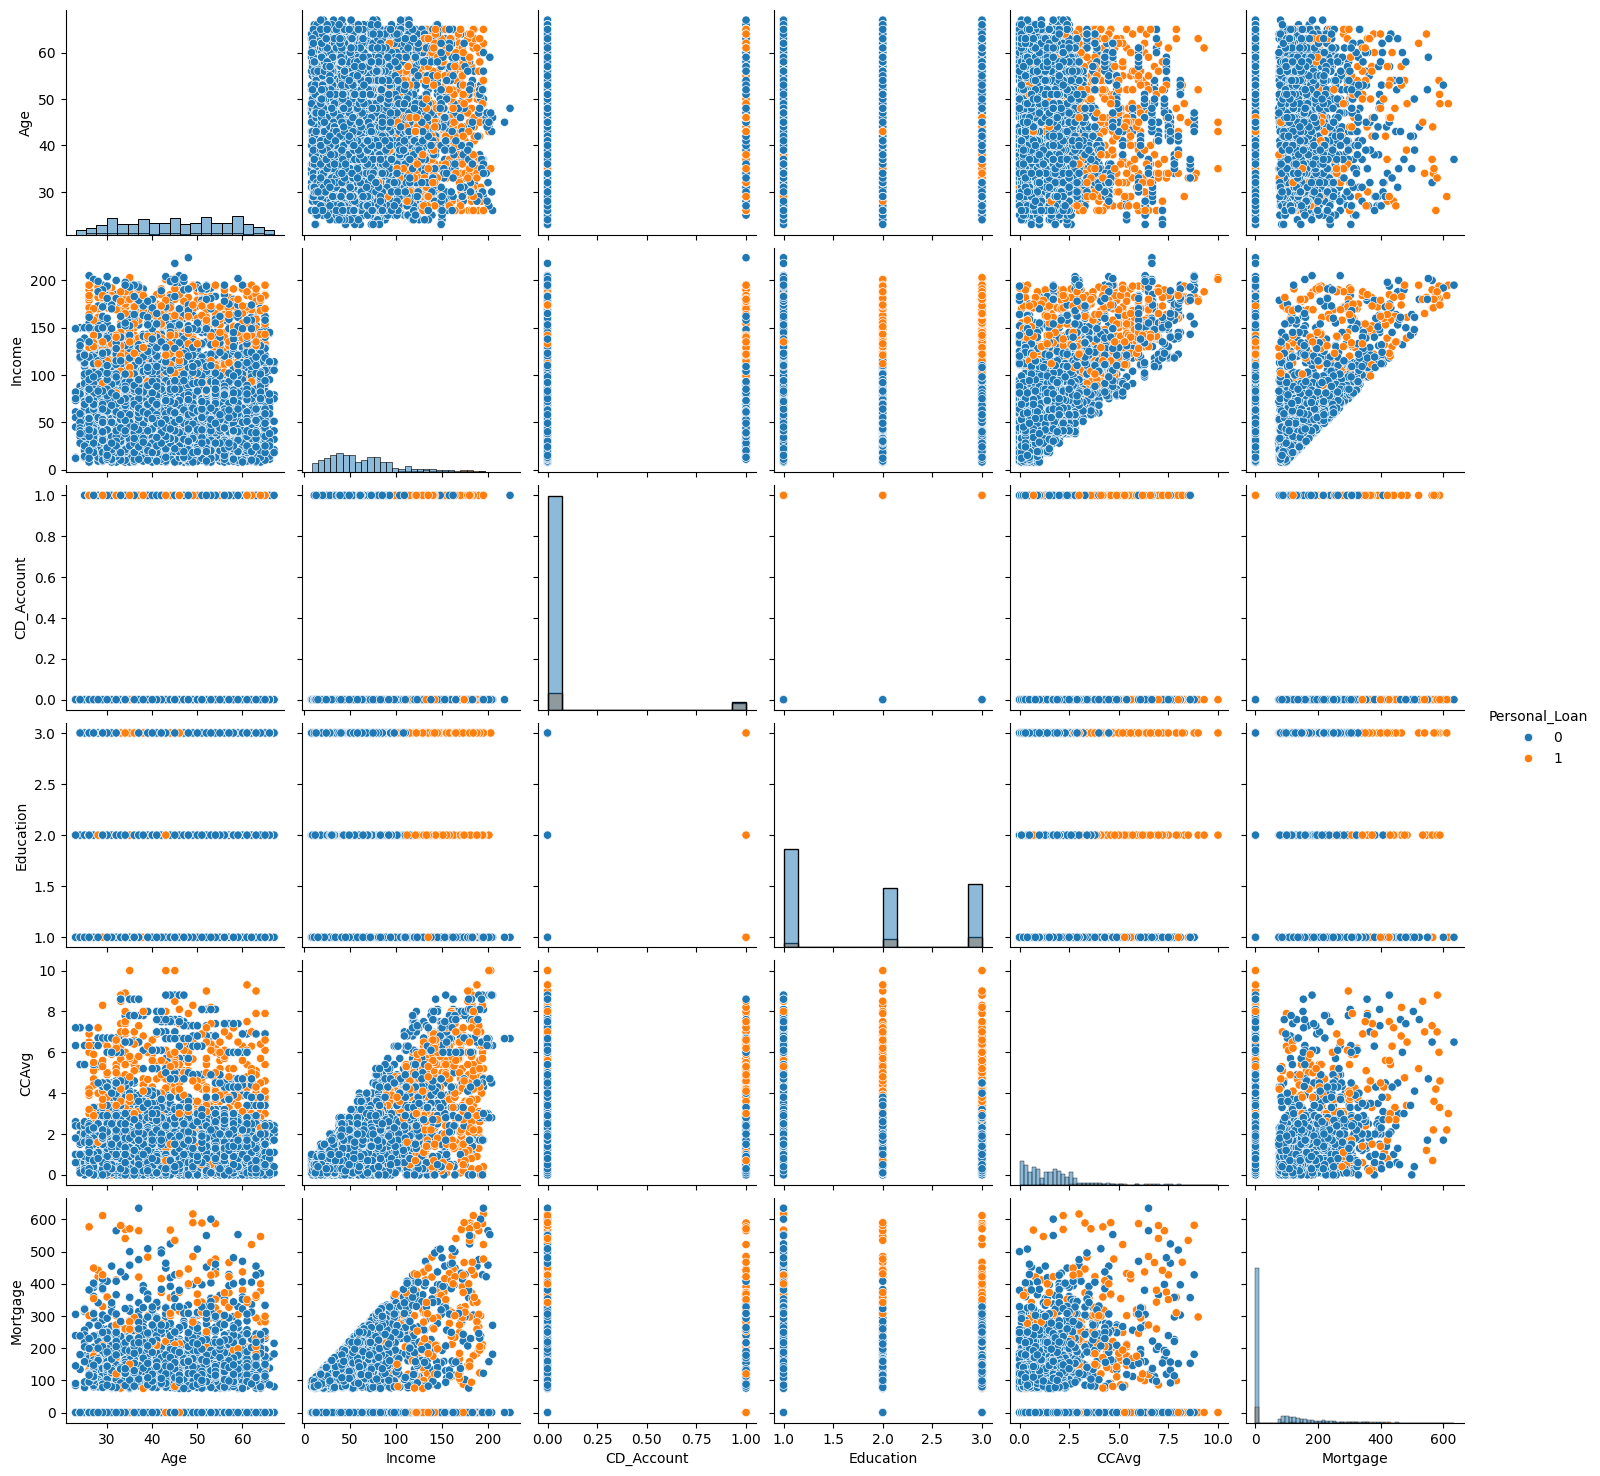

In [ ]:
# Select the columns for the pairplot
columns = ['Age', 'Personal_Loan', 'Income', 'CD_Account', 'Education', 'CCAvg', 'Mortgage']
pp_data = data[columns]

sns.pairplot(pp_data, hue='Personal_Loan', diag_kind='hist')

# Display the plot
plt.show()

*   Income and CCAvg: There is a noticeable concentration of customers with Personal Loans with higher Income (above ~\$100k) and higher CCAvg (above ~\$4k/month), indicating that customers with higher income and credit card spending are more likely to accept loans.

*   Education: The scatter plots show a slight tendency for customers with personal loans to have higher Education levels (2 or 3), aligning with the earlier correlation (0.14).

*   CD_Account and Securities_Account: Customers with CD accounts or Securities accounts tend to have a higher likelihood of accepting personal loans, especially when combined with higher Income or CCAvg.

*   Mortgage: There is a spread of personal loan customers across various Mortgage values, with a slight lean toward higher values, consistent with the 0.14 correlation.

*   Age itself does not show a strong direct correlation with most variables or Personal_Loan. The strongest pattern is the slight increase in loan acceptance among older customers (40–60) with higher Income, CCAvg, Mortgage, CD_Account, and Securities_Account however, I attribute that more to the other variables than age alone.

*   Overall, targeting customers with high Income, high CCAvg, existing CD/Securities accounts, and higher Education levels could improve loan conversion rates.

**Examine Personal_Loan against several highly correlated non-binary variables**

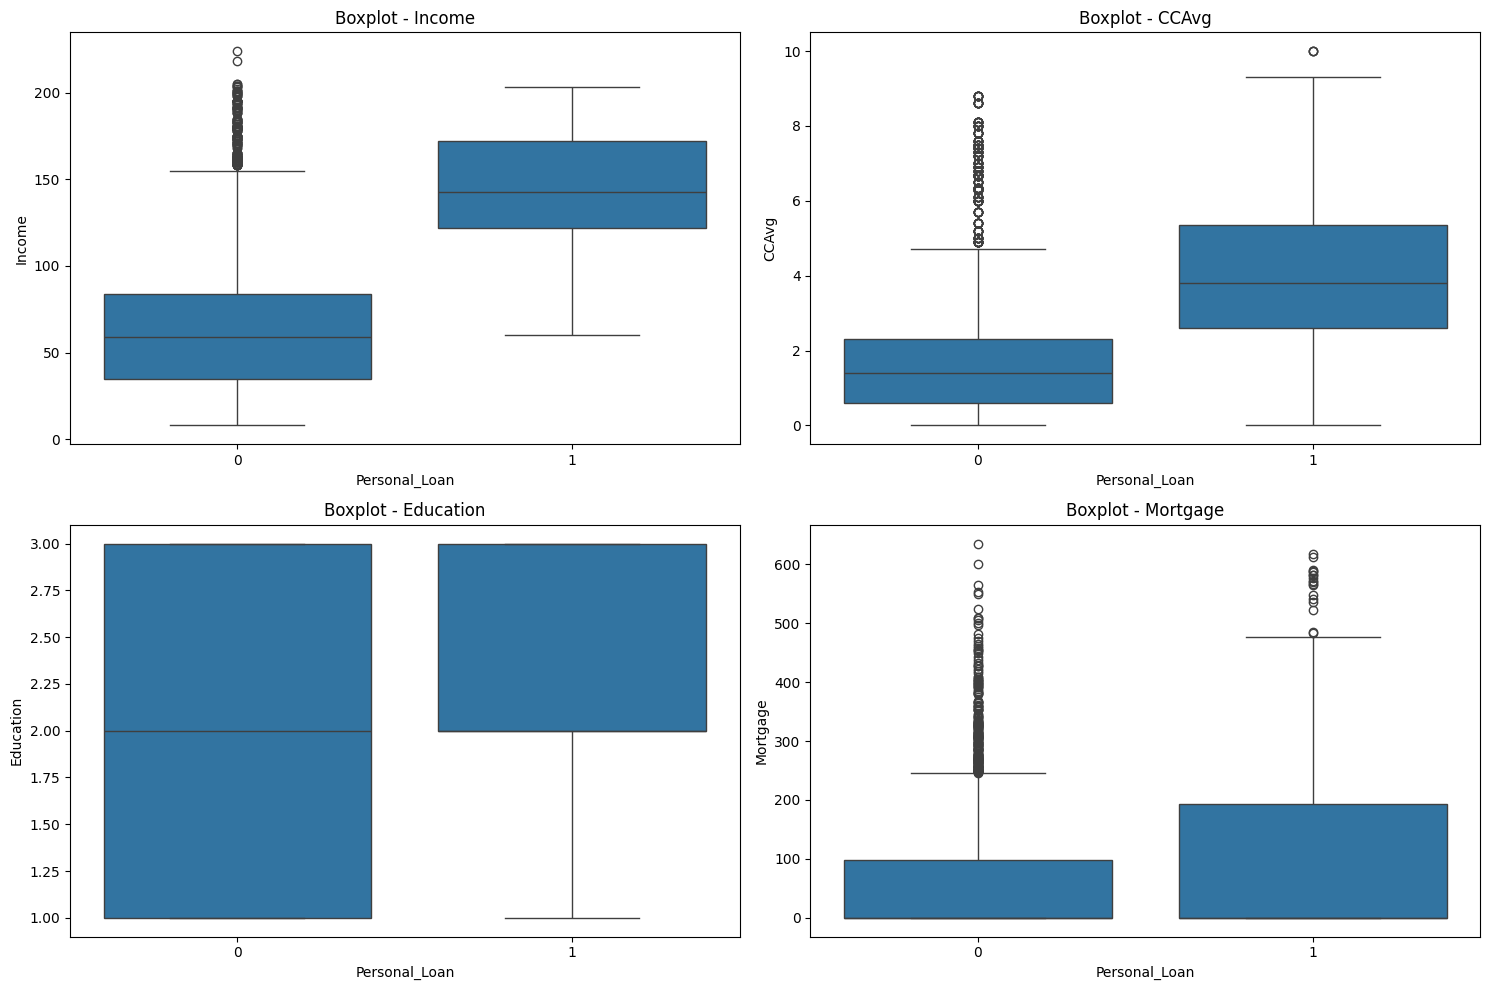

In [ ]:
#Personal_Loan and Income (0.50)
#Personal_Loan and CCAvg (0.37)
#Personal_Loan and CD_Account (0.32) -- binary, not used here
#Personal_Loan and Education (0.14)
#Personal_Loan and Mortgage (0.14)
high_corr_vars = ['Income', 'CCAvg', 'Education', 'Mortgage']

# Set the size of the entire figure
plt.figure(figsize=(15, 10))

# Loop over each variable and create a box plot
for i, hcv in enumerate(high_corr_vars, 1):  # Start indexing from 1 for plt.subplot
    plt.subplot(2,2, i)  # Create a subplot in a 2x2 grid
    sns.boxplot(data=data, x='Personal_Loan', y=hcv)
    plt.title(f'Boxplot - {hcv}')

# If there are any remaining subplot positions, leave them empty
# Adjust layout
plt.tight_layout()
plt.show()


*   Income: Customers with a personal loan have a higher median income (\~\$150k) compared to customers that do not have a personal loan (\~\$100k).
Both groups have outliers above \$200k, but the spread is wider for loan acceptors, suggesting higher income correlates with loan uptake.

*   CCAvg: Median credit card spending is more than double for customers with a personal loan, around (\~$4k) than customers without a personal loan (~2k).
Significant outliers (up to \$10k) exist in both groups, with more extreme values for loan acceptors, indicating higher spending may drive interest in personal loans.

*   Education: Medians are similar (\~2.0–2.5) for both groups, with customers that have personal loans being slightly higher. No outliers indicating education level has a mild positive association with loan acceptance.

*   Mortgage: Customers without a personal loan have a lower median mortgage (\~100k) with many outliers up to 600k. Customers with a personal loan have a higher median mortgage (\~200k) and fewer extreme outliers, suggesting customers with moderate to high mortgages are more likely to take loans.

Overall: Customers with higher Income, CCAvg, CD_Account presence, slightly higher Education, and moderate to high Mortgages are more likely to accept personal loans, supporting targeted marketing toward these segments

## Data Preprocessing

* Missing value treatment
 * No Missing Values
* Feature engineering (if needed)
 * Turned negative experience values into positive values earlier
* Outlier detection and treatment
 * Detected in 'Income', 'CCAvg', 'Mortgage'
 * Will cap these attributes at the 95th percentile
* Preparing data for modeling
 * Will split the data in 80:20 ratio for train and test sets
 * RS variable established in Importing Libraries step at 42
* Any other preprocessing steps
 * Remove 'Experience' due to it's extraordinary high correlation with 'Age'
 * Remove 'ID' due to it being a non-predictive attribute
 * Remove 'ZIPCode' as we will not be creating one-hot dummy variables for this many values and it does not make much business sense
 * NOTE: WE WILL BE USING 'slimData' AND 'slimCapData' AS OUR BASE 'data' OBJECTS. WE WILL REFINE ANALYSIS IF ONE PROVES OR DOES NOT PROVE MORE VALUABLE THAN THE OTHER.

### Preprocessing: Remove 'ID', 'Experience', 'ZIPCode' -and- Apply capping to 'Income', 'CCAvg', 'Mortgage'

In [ ]:
# Drop the ID and Experience columns
slimData = data.drop(['ID', 'Experience', 'ZIPCode'], axis=1)

# Create slimCapData by copying slimData
slimCapData = slimData.copy()

# Apply capping to 'Income', 'CCAvg', and 'Mortgage' at the 95th percentile
for col in ['Income', 'CCAvg', 'Mortgage']:
    upper_limit = slimCapData[col].quantile(0.95)
    slimCapData[col] = slimCapData[col].clip(upper=upper_limit)

# Verify the change (optional)
print(slimCapData[['Income', 'CCAvg', 'Mortgage']].describe())
print(data[['Income', 'CCAvg', 'Mortgage']].describe())


            Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000
mean     73.044200     1.878232    51.551400
std      44.305025     1.568060    85.649701
min       8.000000     0.000000     0.000000
25%      39.000000     0.700000     0.000000
50%      64.000000     1.500000     0.000000
75%      98.000000     2.500000   101.000000
max     170.000000     6.000000   272.000000
            Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000
mean     73.774200     1.937938    56.498800
std      46.033729     1.747659   101.713802
min       8.000000     0.000000     0.000000
25%      39.000000     0.700000     0.000000
50%      64.000000     1.500000     0.000000
75%      98.000000     2.500000   101.000000
max     224.000000    10.000000   635.000000


* Income:
 * slimCap Max: 170k
 * orig data Max: 224k
 * Impact: Mean slightly dropping from 73.77k to 73.04k and Std Dev dropped from 46K to 44.3k.
* CCAvg:
 * slimCap Max: 6k
 * orig data Max: 10k
 * Impact: 6.5% of customers accounted for 23% of total CC spending. Mean decreased from 1.94k to 1.88k and Std Dev dropped from 1.75K to 1.57K.
* Mortgage:
 * slimCap Max: 272k
 * orig data Max: 635k
 * Impact: Capping significantly reduced the maximum mortgage value, addressing the 291 high-value outliers (>252.5k) responsible for 58% of mortgage exposure, with the mean dropping from 56.5k to 51.6k and Std Dev dropping from 101.7k to 85.6k

**slimCapData heatmap**

<Axes: >

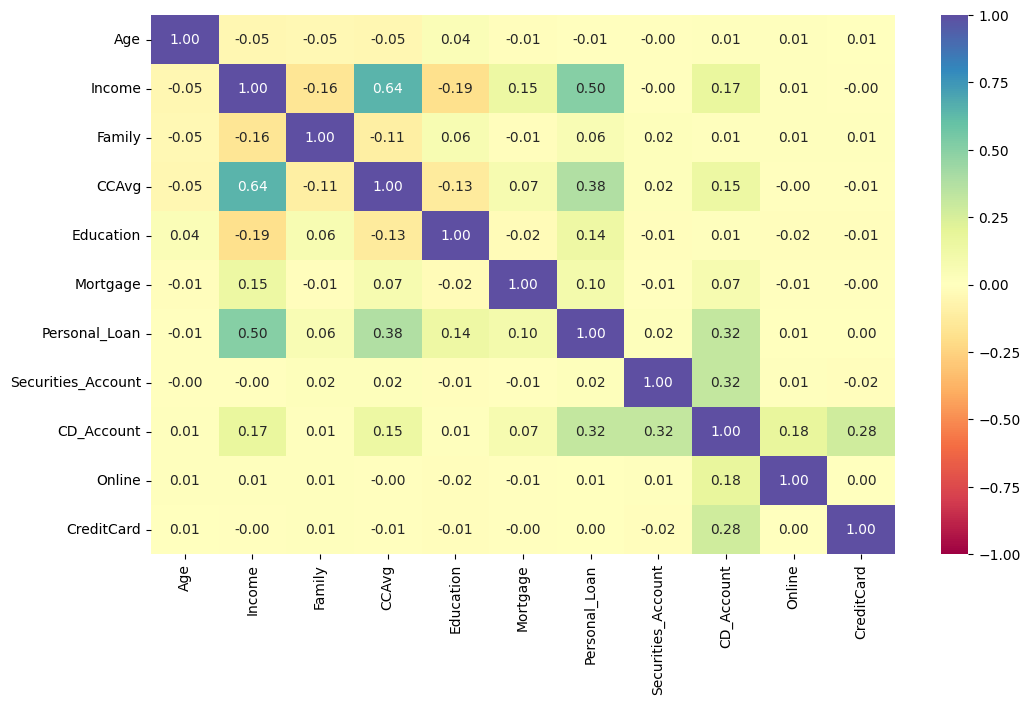

In [ ]:
# defining the size of the plot
plt.figure(figsize=(12, 7))
# produce heatmap with new slimCapData
sns.heatmap(
    slimCapData.corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# Original data correlations
# Personal_Loan and Income (0.50)
# Personal_Loan and CCAvg (0.37)
# Personal_Loan and CD_Account (0.32) -- binary, not used here
# Personal_Loan and Education (0.14)
# Personal_Loan and Mortgage (0.14)

* A slight decrease of (.04) in correlation with Mortgage after capping
* An increase of (.01) in correlation with CCAvg
* Otherwise, no significant changes in correlation

### Preprocessing: Scaling for Clustering, scaled_slim_data

In [ ]:
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns, transform them (i.e., execute the scaling), and create a new dataframe with scaled data
scaled_slim_data = pd.DataFrame(scaler.fit_transform(slimData))

# Display the scaled data
scaled_slim_data.head()

0         1         2         3         4         5         6   \
0 -1.774417 -0.538229  1.397414 -0.193385 -1.049078 -0.555524 -0.325875   
1 -0.029524 -0.864109  0.525991 -0.250611 -1.049078 -0.555524 -0.325875   
2 -0.552992 -1.363793 -1.216855 -0.536736 -1.049078 -0.555524 -0.325875   
3 -0.901970  0.569765 -1.216855  0.436091  0.141703 -0.555524 -0.325875   
4 -0.901970 -0.625130  1.397414 -0.536736  0.141703 -0.555524 -0.325875   

         7        8         9         10  
0  2.928915 -0.25354 -1.216618 -0.645314  
1  2.928915 -0.25354 -1.216618 -0.645314  
2 -0.341423 -0.25354 -1.216618 -0.645314  
3 -0.341423 -0.25354 -1.216618 -0.645314  
4 -0.341423 -0.25354 -1.216618  1.549632

In [ ]:
scaled_slim_data.describe()

0             1             2             3             4   \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean  -2.131628e-18  1.449507e-16  1.001865e-16 -6.394885e-17  2.557954e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -1.948906e+00 -1.428969e+00 -1.216855e+00 -1.108987e+00 -1.049078e+00   
25%   -9.019702e-01 -7.554825e-01 -1.216855e+00 -7.084116e-01 -1.049078e+00   
50%   -2.952359e-02 -2.123482e-01 -3.454321e-01 -2.506106e-01  1.417029e-01   
75%    8.429230e-01  5.263146e-01  5.259909e-01  3.216407e-01  1.332484e+00   
max    1.889859e+00  3.263712e+00  1.397414e+00  4.613525e+00  1.332484e+00   

                 5             6             7             8             9   \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean  -5.613288e-17 -4.973799e-17 -2.273737e-17  2.131628e-17  4.121148e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -5.555239e-01 -3.258753e-01 -3.414233e-01 -2.535403e-01 -1.216618e+00   
25%   -5.555239e-01 -3.258753e-01 -3.414233e-01 -2.535403e-01 -1.216618e+00   
50%   -5.555239e-01 -3.258753e-01 -3.414233e-01 -2.535403e-01  8.219509e-01   
75%    4.375576e-01 -3.258753e-01 -3.414233e-01 -2.535403e-01  8.219509e-01   
max    5.688108e+00  3.068659e+00  2.928915e+00  3.944146e+00  8.219509e-01   

                 10  
count  5.000000e+03  
mean   7.105427e-18  
std    1.000100e+00  
min   -6.453143e-01  
25%   -6.453143e-01  
50%   -6.453143e-01  
75%    1.549632e+00  
max    1.549632e+00

### Preprocessing: Scaling for Clustering, scaled_cap_data

In [ ]:
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns, transform them (i.e., execute the scaling), and create a new dataframe with scaled data
scaled_cap_data = pd.DataFrame(scaler.fit_transform(slimCapData))

# Display the scaled data
scaled_cap_data.head()

0         1         2         3         4         5         6   \
0 -1.774417 -0.542751  1.397414 -0.177455 -1.049078 -0.601947 -0.325875   
1 -0.029524 -0.881347  0.525991 -0.241234 -1.049078 -0.601947 -0.325875   
2 -0.552992 -1.400527 -1.216855 -0.560132 -1.049078 -0.601947 -0.325875   
3 -0.901970  0.608475 -1.216855  0.524119  0.141703 -0.601947 -0.325875   
4 -0.901970 -0.633043  1.397414 -0.560132  0.141703 -0.601947 -0.325875   

         7        8         9         10  
0  2.928915 -0.25354 -1.216618 -0.645314  
1  2.928915 -0.25354 -1.216618 -0.645314  
2 -0.341423 -0.25354 -1.216618 -0.645314  
3 -0.341423 -0.25354 -1.216618 -0.645314  
4 -0.341423 -0.25354 -1.216618  1.549632

In [ ]:
scaled_cap_data.describe()

0             1             2             3             4   \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean  -2.131628e-18 -7.105427e-17  1.001865e-16  7.105427e-17  2.557954e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -1.948906e+00 -1.468247e+00 -1.216855e+00 -1.197926e+00 -1.049078e+00   
25%   -9.019702e-01 -7.684818e-01 -1.216855e+00 -7.514700e-01 -1.049078e+00   
50%   -2.952359e-02 -2.041553e-01 -3.454321e-01 -2.412343e-01  1.417029e-01   
75%    8.429230e-01  5.633288e-01  5.259909e-01  3.965603e-01  1.332484e+00   
max    1.889859e+00  2.188589e+00  1.397414e+00  2.628841e+00  1.332484e+00   

                 5             6             7             8             9   \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean  -2.273737e-17 -4.973799e-17 -2.273737e-17  2.131628e-17  4.121148e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -6.019467e-01 -3.258753e-01 -3.414233e-01 -2.535403e-01 -1.216618e+00   
25%   -6.019467e-01 -3.258753e-01 -3.414233e-01 -2.535403e-01 -1.216618e+00   
50%   -6.019467e-01 -3.258753e-01 -3.414233e-01 -2.535403e-01  8.219509e-01   
75%    5.773931e-01 -3.258753e-01 -3.414233e-01 -2.535403e-01  8.219509e-01   
max    2.574097e+00  3.068659e+00  2.928915e+00  3.944146e+00  8.219509e-01   

                 10  
count  5.000000e+03  
mean   7.105427e-18  
std    1.000100e+00  
min   -6.453143e-01  
25%   -6.453143e-01  
50%   -6.453143e-01  
75%    1.549632e+00  
max    1.549632e+00

### Preprocessing: Test Train Splitting

In [ ]:
# define the explanatory (independent) and response (dependent) variables
# from the slimData and slimCapData dataframes, create new dataframes '...X' but drop 'Personal_Loan'

slimX = slimData.drop('Personal_Loan', axis=1)
capX = slimCapData.drop('Personal_Loan', axis=1)

# create new dataframes '...Y' that contain only the 'Personal_Loan' column
slimY = slimData['Personal_Loan']
capY = slimCapData['Personal_Loan']

# splitting the data in 80:20 ratio for train and test sets
# ...X_train, ...X_test, ...y_train, ..y_test = train_test_split(X, y, test_size=0.20,random_state=RS)
# random_state, RS - using the same seed value (42) to ensure running the code again will produce the same split

slimX_train, slimX_test, slimY_train, slimY_test = train_test_split(
    slimX,    # specifying the independent variables 'The Feature Matrix' that contains independent variables
    slimY,    # specifying the dependent variable 'The Target Vector' that contains dependent variables
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=RS    # specifying a seed value to enable reproducible results
)

capX_train, capX_test, capY_train, capY_test = train_test_split(
    capX,    # specifying the independent variables 'The Feature Matrix' that contains independent variables
    capY,    # specifying the dependent variable 'The Target Vector' that contains dependent variables
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=RS    # specifying a seed value to enable reproducible results
)

## Model Building

### Model Evaluation Criterion

* Model evaluation will use Accuracy, Recall, Precision, and F1-score to assess the performance of Decision Trees built on both slimData and slimCapData, comparing results against the 9% baseline conversion rate to identify effective loan acceptor predictions. The confusion matrix will provide a visual breakdown of true positives, false positives, etc. For Clustering, inertia (within-cluster sum of squares, WCSS) will evaluate cluster quality, with lower values indicating better segmentation of potential loan customers.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target, title="Confusion Matrix"):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a title to the plot
    plt.title(title)

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

### Initial Decision Tree Model Building

In [ ]:
# creating an instance of the decision tree model
slimDtree1 = DecisionTreeClassifier(random_state=RS)
capDtree1 = DecisionTreeClassifier(random_state=RS)

# fitting the model to the training data
slimDtree1.fit(slimX_train, slimY_train)
capDtree1.fit(capX_train, capY_train)

DecisionTreeClassifier(random_state=42)

### Initial Decision Tree Model Evaluation

slimData Training Performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
slimCapData Training Performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
slimData Testing Performance:
    Accuracy    Recall  Precision        F1
0     0.983  0.895238       0.94  0.917073
slimCapData Testing Performance:
    Accuracy    Recall  Precision        F1
0     0.983  0.895238       0.94  0.917073


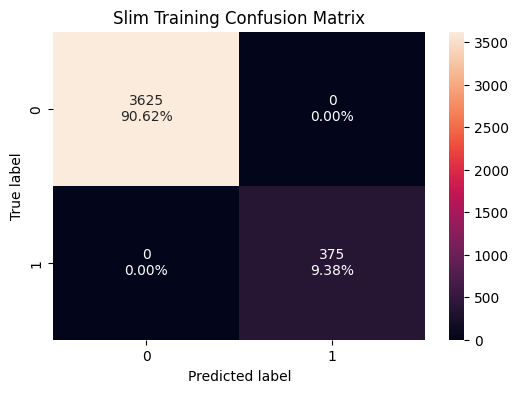

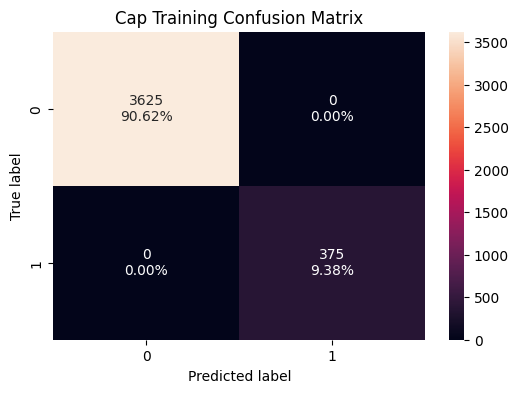

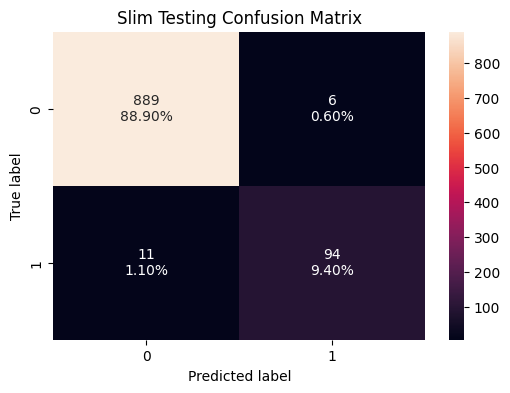

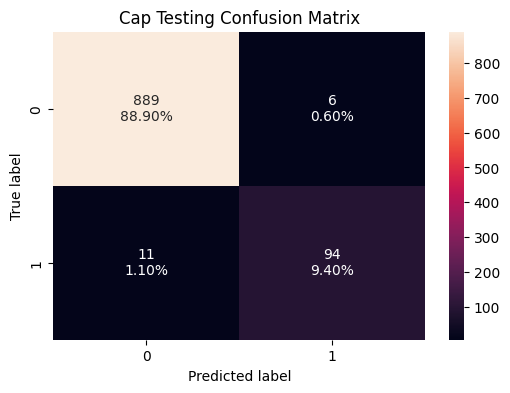

In [ ]:
# Evaluate slimData training set
perf_slim = model_performance_classification(slimDtree1, slimX_train, slimY_train)
print("slimData Training Performance:\n", perf_slim)
plot_confusion_matrix(slimDtree1, slimX_train, slimY_train, "Slim Training Confusion Matrix")

# Evaluate slimCapData training set
perf_cap = model_performance_classification(capDtree1, capX_train, capY_train)
print("slimCapData Training Performance:\n", perf_cap)
plot_confusion_matrix(capDtree1, capX_train, capY_train, "Cap Training Confusion Matrix")

# Evaluate testing data sets
slimDtree1_test_perf = model_performance_classification(slimDtree1, slimX_test, slimY_test)
capDtree1_test_perf = model_performance_classification(capDtree1, capX_test, capY_test)
print("slimData Testing Performance:\n", slimDtree1_test_perf)
print("slimCapData Testing Performance:\n", capDtree1_test_perf)
plot_confusion_matrix(slimDtree1, slimX_test, slimY_test, "Slim Testing Confusion Matrix")
plot_confusion_matrix(capDtree1, capX_test, capY_test, "Cap Testing Confusion Matrix")

* Overfitting: The perfect training scores (1.0) suggest overfitting and are confirmed when compared to slightly lower test scores (0.983). This is expected with unpruned Decision Trees.
* Capping Impact: The identical test performance between slimData and slimCapData suggests that capping outliers did not meaningfully affect the Decision Tree algorithm\'s ability to generalize, possibly because the tree naturally handled outliers via splits.
* Business Goal: With Recall at 0.895, over 10% of actual loan acceptors are missed, which might be acceptable but certainly could be improved for better targeting.

### Visualize initial Decision Tree

* Since there is little to no discernable difference between slim and cap thus far, there is no need to duplicate the initial Decision Tree visualization

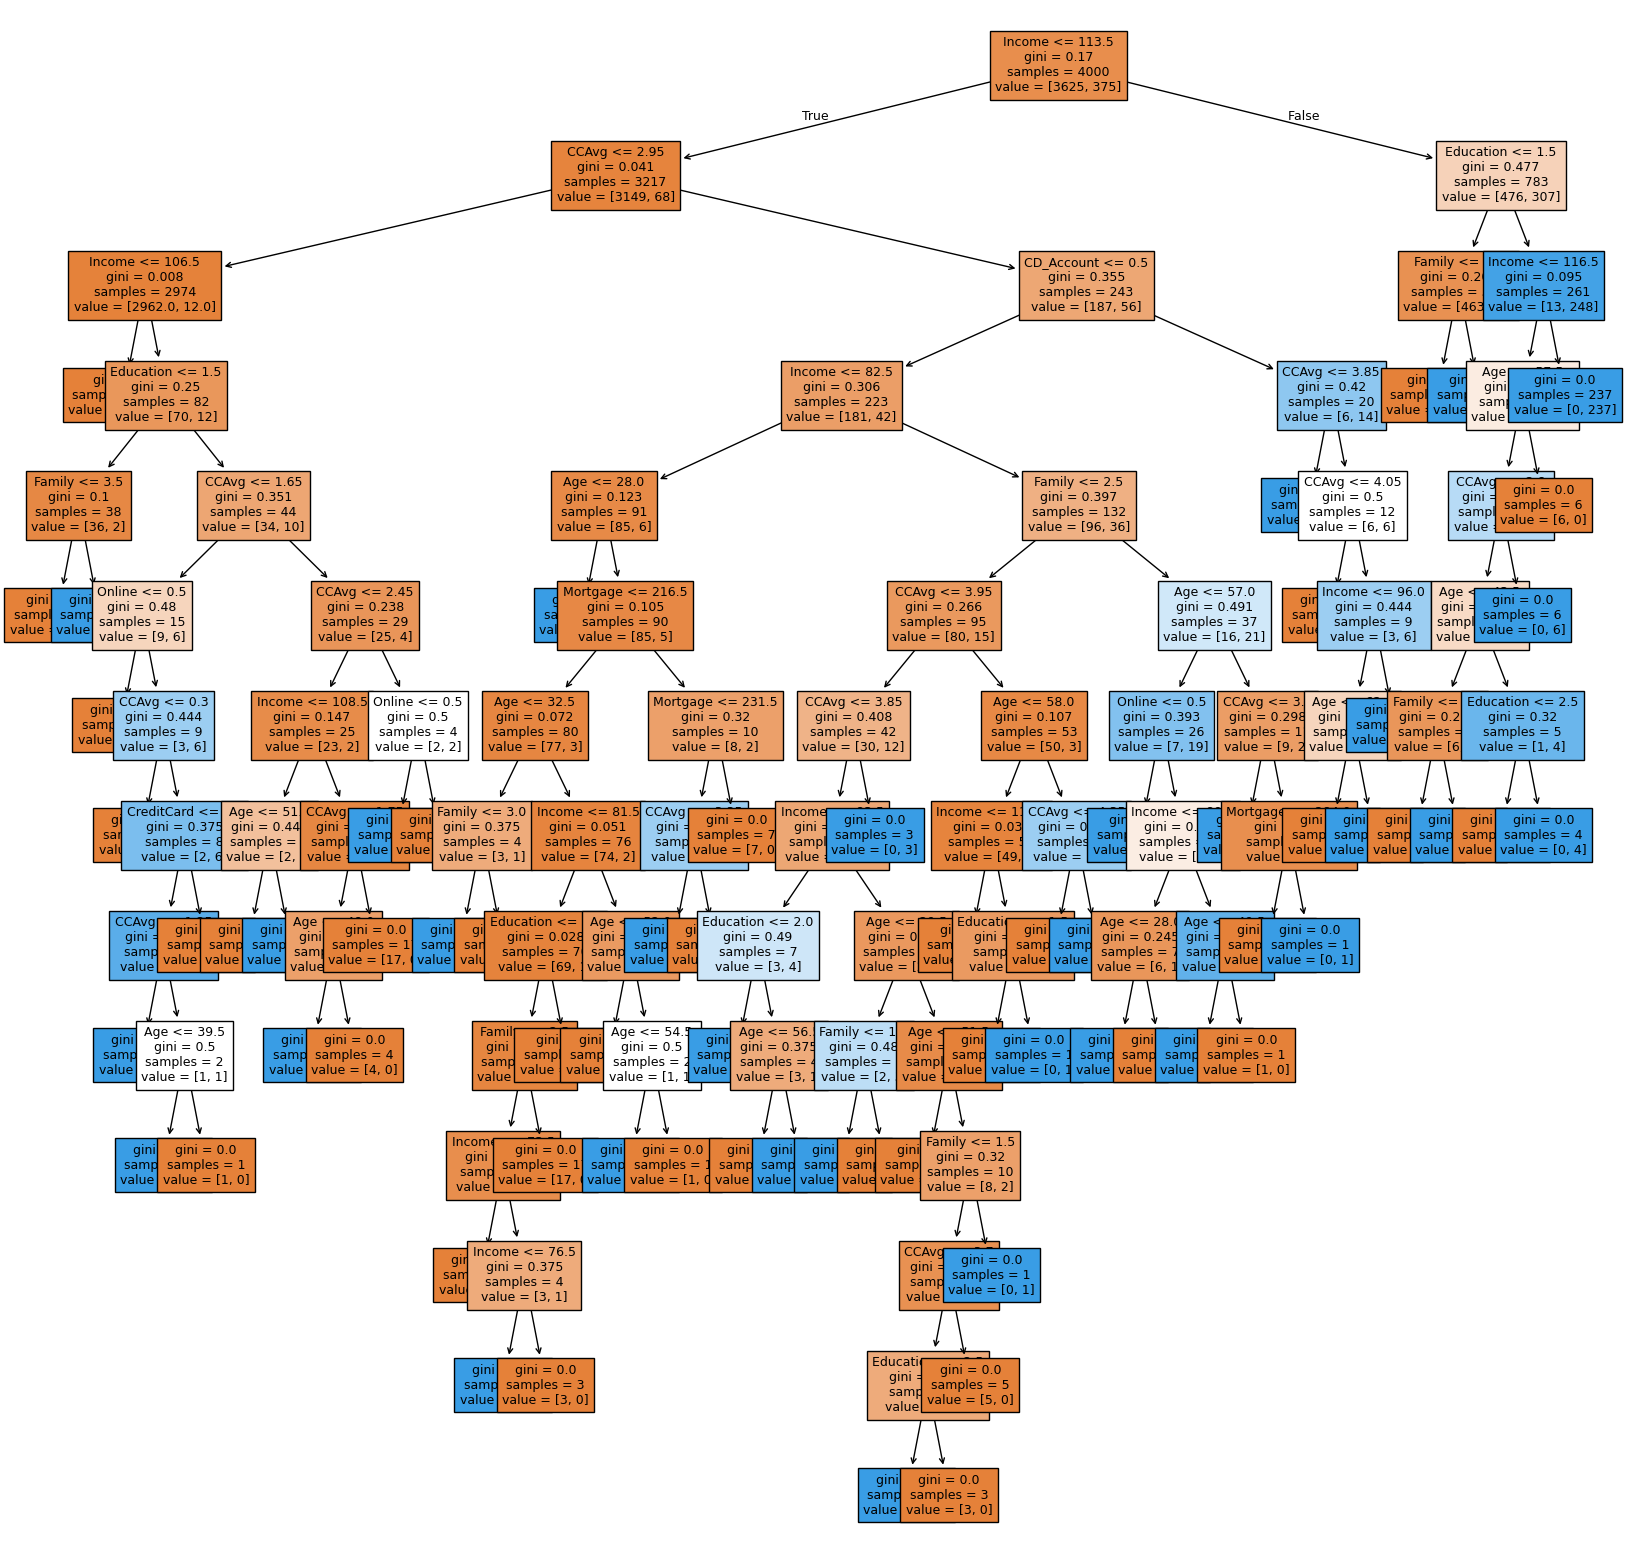

In [ ]:
# list of feature names in X_train
# initial_feature_names = list(slimX_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    slimDtree1,                         # decision tree classifier model
    feature_names=slimX_train.columns,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

### Decision Tree Performance Improvement (Pre-pruning)

In [ ]:
# define the parameters of the tree to iterate over
#max_depth_values = np.arange(2, 11, 2)
#max_leaf_nodes_values = np.arange(10, 51, 10)
#min_samples_split_values = np.arange(10, 51, 10)

max_depth_values = np.arange(2, 7, 1)
max_leaf_nodes_values = np.arange(5, 21, 5)
min_samples_split_values = np.arange(5, 26, 5)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=RS
            )

            # fit the model to the training data
            estimator.fit(slimX_train, slimY_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(slimX_train)
            y_test_pred = estimator.predict(slimX_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(slimY_train, y_train_pred)
            test_f1_score = f1_score(slimY_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [ ]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(slimX_train, slimY_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=np.int64(15),
                       min_samples_split=np.int64(5), random_state=42)

dtree2 Training Performance:
    Accuracy  Recall  Precision        F1
0    0.9875   0.904    0.96034  0.931319
dtree2 Testing Performance:
    Accuracy    Recall  Precision        F1
0     0.986  0.914286   0.950495  0.932039


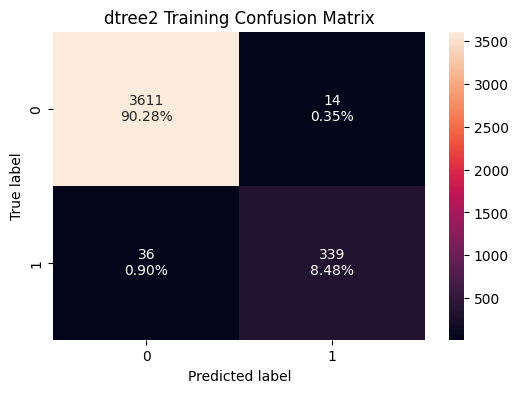

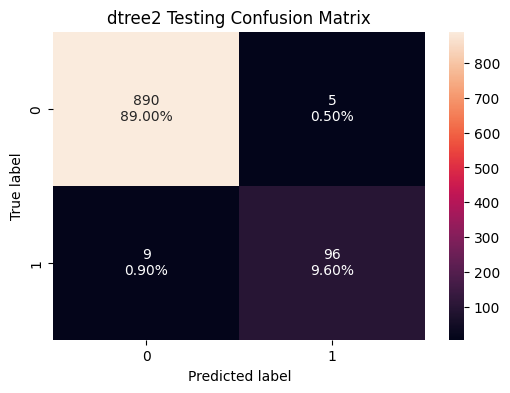

In [ ]:
# Evaluate slimData training set
perf_dtree2 = model_performance_classification(dtree2, slimX_train, slimY_train)
print("dtree2 Training Performance:\n", perf_dtree2)
plot_confusion_matrix(dtree2, slimX_train, slimY_train, "dtree2 Training Confusion Matrix")

# Evaluate testing data sets
dtree2_test_perf = model_performance_classification(dtree2, slimX_test, slimY_test)
print("dtree2 Testing Performance:\n", dtree2_test_perf)
plot_confusion_matrix(dtree2, slimX_test, slimY_test, "dtree2 Testing Confusion Matrix")

* The training and test scores are very close to each other, indicating a generalized performance.

### Visualizing Decision Tree after Pre-pruning

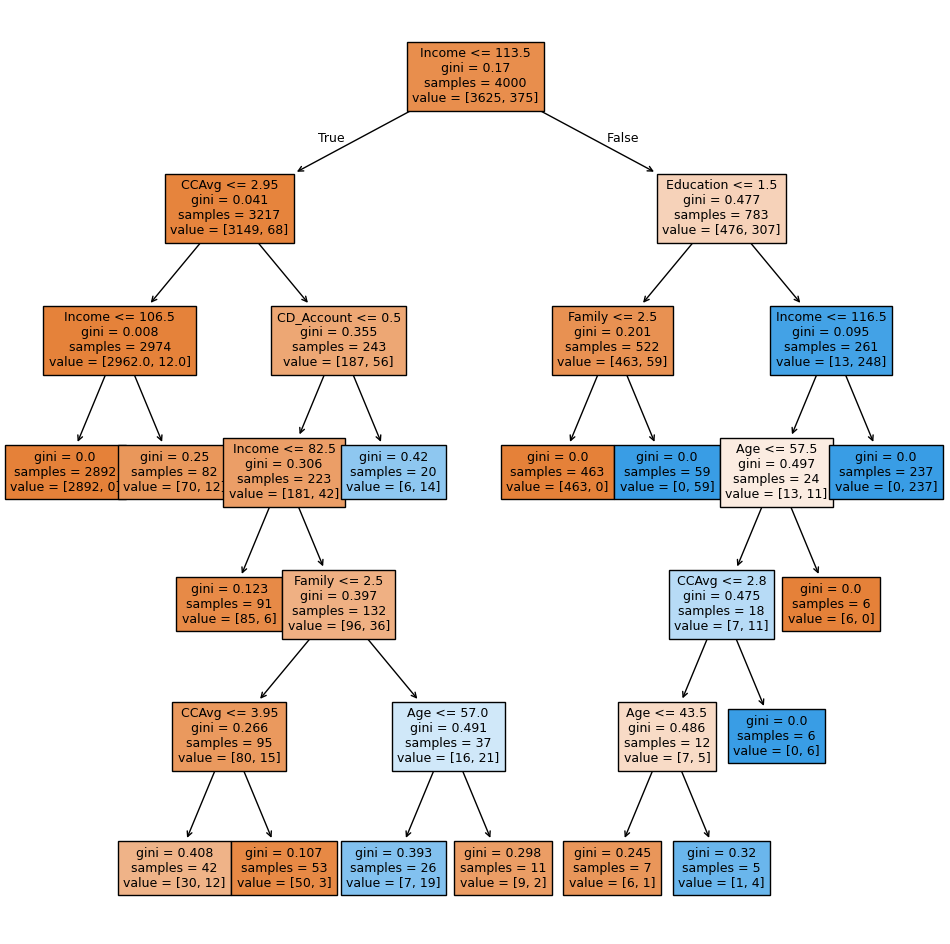

In [ ]:
# list of feature names in X_train
# pre_feature_names = list(slimX_train.columns)

# set the figure size for the plot
plt.figure(figsize=(12, 12))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=slimX_train.columns,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=slimX_train.columns,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [70.00, 12.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [85.00, 6.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |   |--- weights: [30.00, 12.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |   |--- weights: [50.00, 3.00] class: 0
|   |   |   |   |--- Family >  2.50
|   |   |   |   |   |--- Age <= 57.00
|   |   |   |   |   |   |--- weights: [7.00, 19.00] class: 1
|   |   |   |   |   |--- Age >  57.00
|   |   |   |   |   |   |--- weights: [9.00, 2.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [6.00, 14.00] class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family 

### Decision Tree Pre-pruning Model Evaluation and Conclusion

* After running several models, it was decided to go with the model with a depth of 6 versus a depth of 4.
* Depth-6 captures 91.4% of true loan acceptors, with 95.0% of predicted acceptors being correct. The high Recall suggests broad outreach potential.
* Depth = 6 Performance
 * Training Performance:
 * Accuracy = 0.988, Recall = 0.904, Precision = 0.960, F1 = 0.931
 * Testing Performance:
 * Accuracy = 0.986, Recall = 0.914, Precision = 0.950, F1 = 0.932
* Depth = 4 Performance
 * Training Performance:
 * Accuracy = 0.983, Recall = 0.840, Precision = 0.978, F1 = 0.904
 * Testing Performance:
 * Accuracy = 0.983, Recall = 0.867, Precision = 0.968, F1 = 0.915
* The bank would prefer depth-6 decision tree model because its higher Recall (0.914) maximizes the identification of potential loan acceptors, supporting the goal of rapid borrower base expansion and improving on the 9% baseline. The slight trade-off in Precision (0.950 vs 0.968) is acceptable for an initial broad campaign, with refinements possible later. The lower Recall of depth-4 (0.867) misses over 13% of acceptors, reducing the pool of potential conversions. Given the bank's interest in rapid expansion, this conservative approach might limit the campaign's impact, especially when the Precision gain (0.968 vs. 0.950) is marginal and manageable with post-campaign filtering.


### Decision Tree Performance Improvement (Post-pruning)

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=RS)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(slimX_train, slimY_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

pd.DataFrame(path).head()

ccp_alphas  impurities
0    0.000000    0.000000
1    0.000123    0.000493
2    0.000160    0.000974
3    0.000214    0.001402
4    0.000222    0.001847

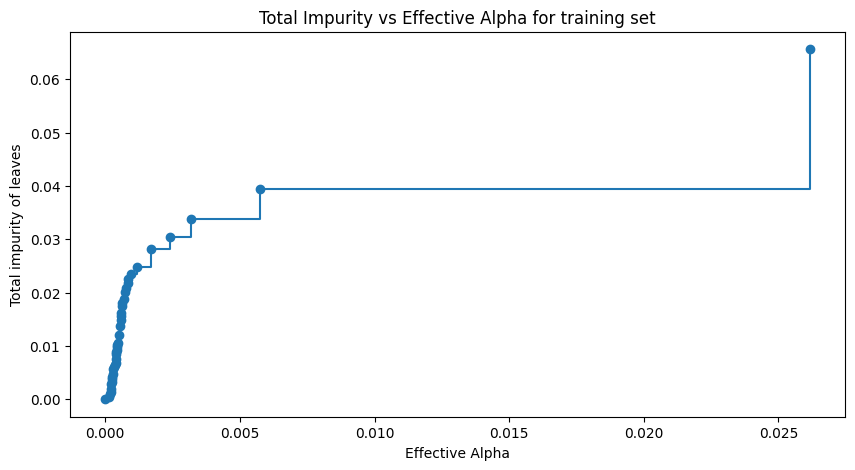

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

* The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the corresponding tree with one node.

In [ ]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=RS)

    # Fit the classifier to the training data
    clf.fit(slimX_train, slimY_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.052149301489438284


* Remove the last element in clfs and ccp_alphas as it corresponds to a trivial tree with only one node.

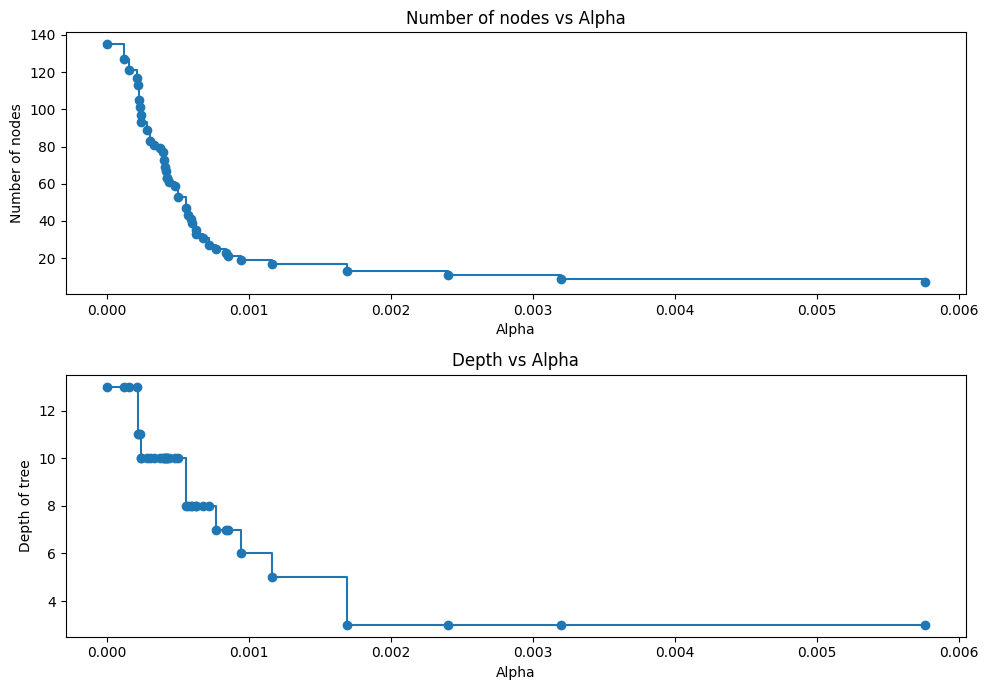

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(slimX_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(slimY_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(slimX_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(slimY_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

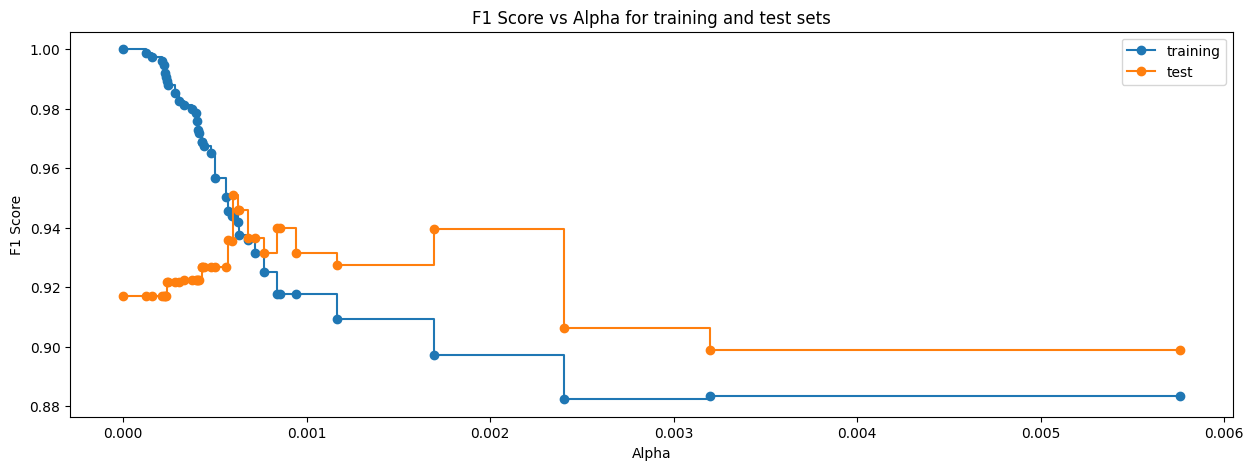

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
postPruneDTree = clfs[index_best_model]
print(postPruneDTree)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0006000000000000003),
                       random_state=42)


### Visualizing Decision Tree after Post-pruning

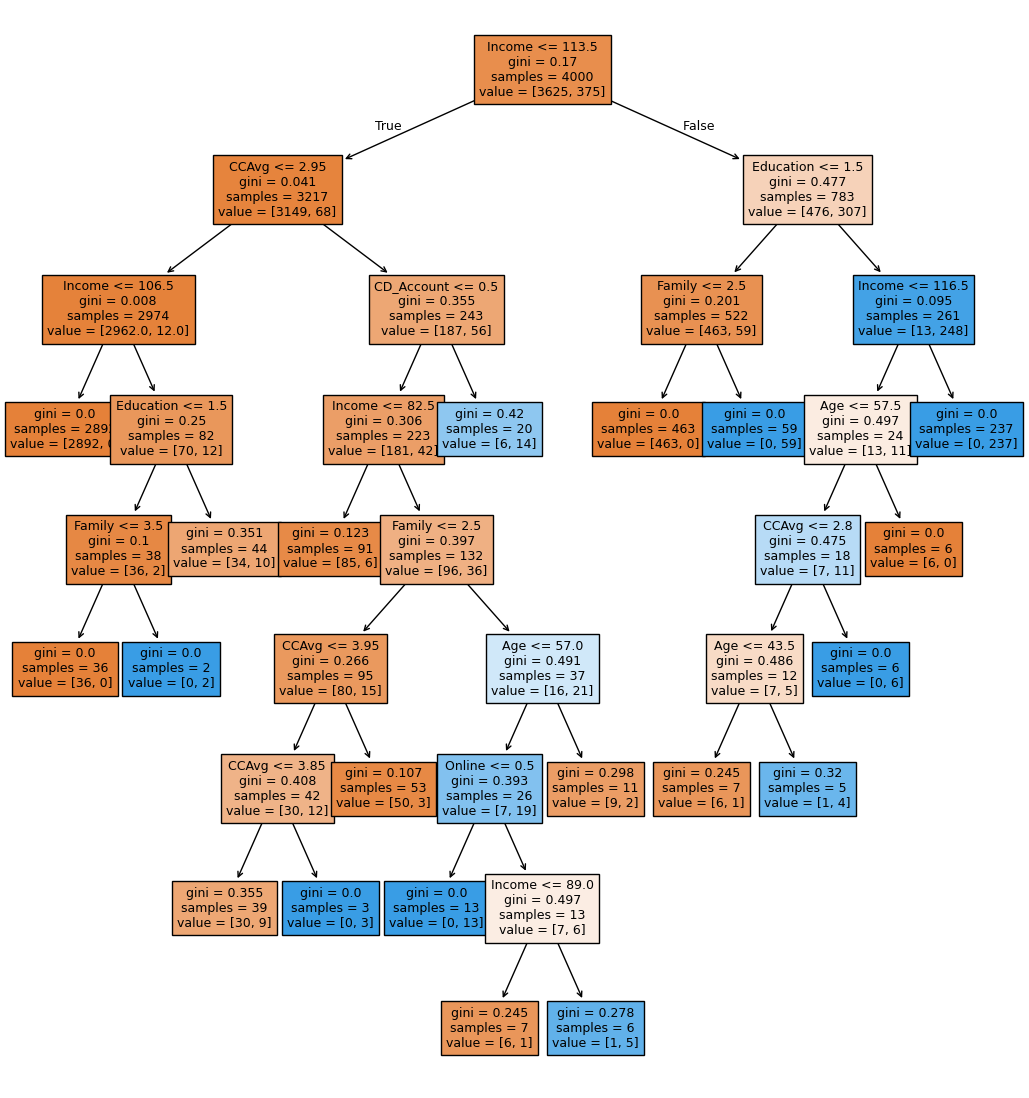

In [ ]:
# list of feature names in X_train
# post_feature_names = list(slimCapData.columns)

# set the figure size for the plot
plt.figure(figsize=(13, 14))

# plotting the decision tree
out = tree.plot_tree(
    postPruneDTree,                         # decision tree classifier model
    feature_names=slimX_train.columns,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        postPruneDTree,    # specify the model
        feature_names=slimX_train.columns,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [36.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [34.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [85.00, 6.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |   |--- CCAvg <= 3.85
|   |   |   |   |   |   |   |--- weights: [30.00, 9.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.85
|   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |   |--- wei

### Decision Tree Post-pruning Model Evaluation and Conclusion

Post Pruning Training Performance


Accuracy    Recall  Precision        F1
0      0.99  0.914667   0.977208  0.944904

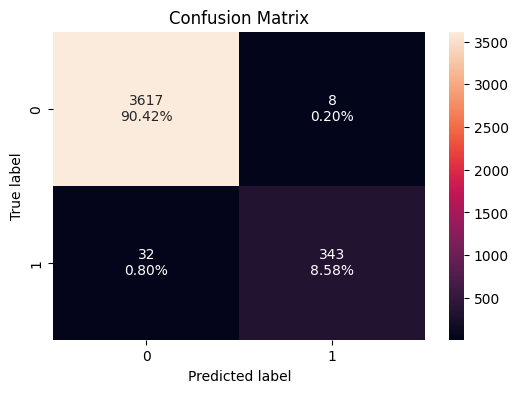

In [ ]:
print("Post Pruning Training Performance")

plot_confusion_matrix(postPruneDTree, slimX_train, slimY_train)

postPruneDTree_train_perf = model_performance_classification(
   postPruneDTree, slimX_train, slimY_train
)
postPruneDTree_train_perf

Post Pruning Testing Performance


Accuracy   Recall  Precision       F1
0      0.99  0.92381   0.979798  0.95098

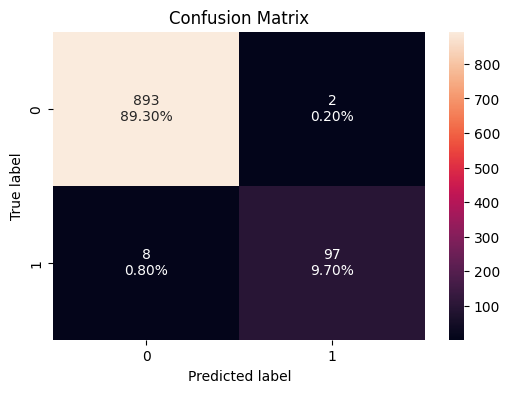

In [ ]:
print("Post Pruning Testing Performance")

plot_confusion_matrix(postPruneDTree, slimX_test, slimY_test)

postPruneDTree_test_perf = model_performance_classification(
   postPruneDTree, slimX_test, slimY_test
)
postPruneDTree_test_perf

**Post Pruning Conclusion**
* True Positives (Loan Takers Correctly Identified):
 * Training: 8.58% of all customers
 * Testing: 9.7% of all customers

* False Negatives (Missed Loan Opportunities):
 * Training: 0.7%
 * Testing: 0.8%

* False Positives (Wasted Marketing Spend):
 * Training: 0.2%
 * Testing: 0.2%

* True Negatives
 * Training: 90.42%
 * Testing: 89.3%

* Practical Business Implications:
 * Very low false positive rate (0.2%) means minimal wasted marketing spend and the model successfully identifies most actual loan takers. This performance is consistent between training and testing
 * Since only about 9-10% of the customer base are likely loan takers, the model does well within this constraint. The pool of targetable customers is naturally small and model performs quite well for this imbalanced scenario.
 * The 92% recall means we have captured most of the limited pool of loan-interested customers while keeping marketing waste very low. This is exactly what we want for a targeted personal loan campaign - we just need to keep realistic expectations about the total number of customers we identify as good prospects.

### Clustering

Using the scaled datasets established in preprocessing

*   scaled_slim_data
*   scaled_cap_data

Will begin analysis and processing with both, if there appears no noticeable difference in clustering, we will stick with scaled_slim_data



### Reduce the datasets to two dimensions using T-SNE

In [ ]:
# Initiating the t-SNE object
# n_components=2: we will reduce the data to 2 dimensions
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne2 = TSNE(n_components=2, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit the t-SNE model to the two datasets and transform them into the specified number of dimensions
tsne2_reduced_slim_data = tsne2.fit_transform(scaled_slim_data)
tsne2_reduced_cap_data = tsne2.fit_transform(scaled_cap_data)

# Create DataFrames from the reduced datasets
tsne_2d_slim_data = pd.DataFrame(tsne2_reduced_slim_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions
tsne_2d_cap_data = pd.DataFrame(tsne2_reduced_cap_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions

Create and compare Scatterplots for both new t-SNE datasets

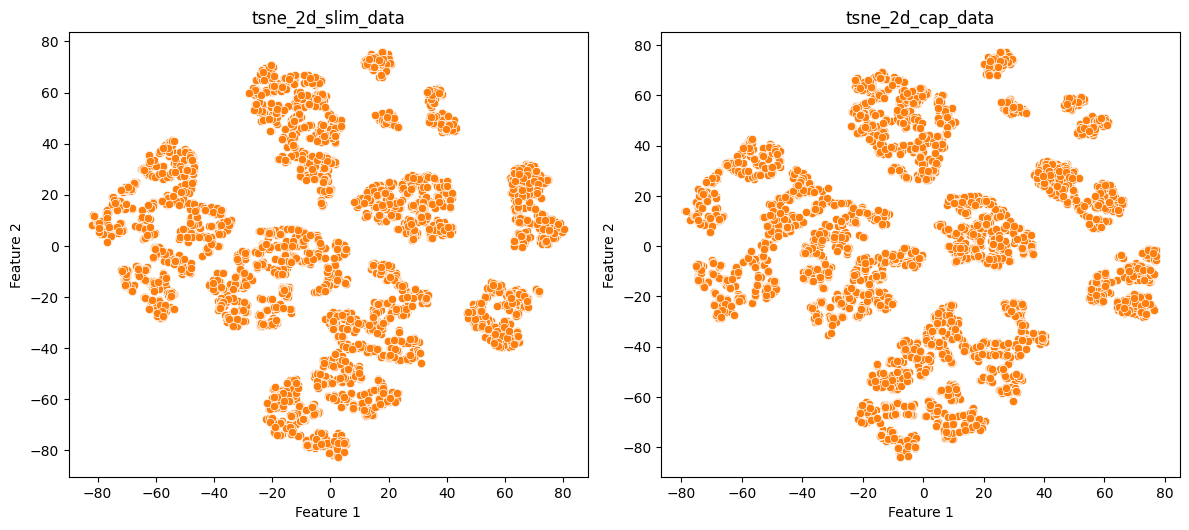

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

tsne_dataframes = ['tsne_2d_slim_data', 'tsne_2d_cap_data']


# Iterate over the tsne datasets
for i in tsne_dataframes:
    # Historgram
    plt.subplot(2, 2, 1)  # assign subplot in the main plot
    sns.scatterplot(tsne_2d_slim_data, x="Feature 1", y="Feature 2");
    plt.title('tsne_2d_slim_data')  # add title
    # Box Plot
    plt.subplot(2, 2, 2)  # assign subplot in the main plot
    sns.scatterplot(tsne_2d_cap_data, x="Feature 1", y="Feature 2");
    plt.title('tsne_2d_cap_data')  # add title

plt.tight_layout();   # to add spacing between plots
plt.show()

* The capping appears to have helped reveal the latent structure in the data, allowing t-SNE better able to discover and preserve the natural clusters by reducing the influence of outliers and bringing those extreme values closer to the bulk of the data.
* The capped data clusters are sharper, with clear boundaries between the 10 or 11 distinct groupings. Very few, if any points lie in between clusters — indicating a strong internal cohesion and better feature scaling / noise reduction.
* The uncapped data has a greater presence of inter-cluster noise and overlap, which can make our downstream tasks like clustering and classification more difficult.
* We will continue forward with analysis of both however, for the purposes of keeping the analysis concise, if the capped data proves to be noticeably superior I will not publish any analysis of the uncapped results. As such, we  not see the uncapped data again.

### 2-dimensional t-SNE perplexity analysis

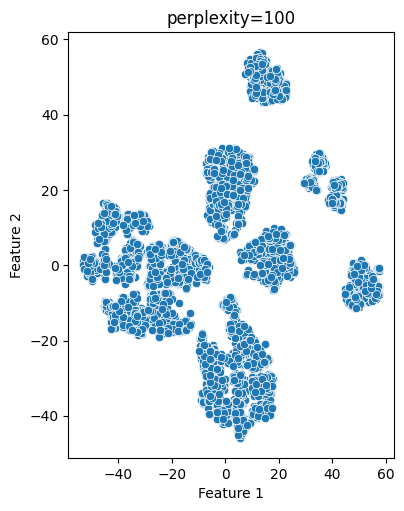

In [ ]:
# Define the list of perplexity values to iterate over
#
# NOTE: as mentioned below, this code block took over 5 minutes to execute
# In the interest of saving time for both myself and anyone who reviews this
# I commented out the actual array of perpexity values that were used in my analysis
#
# perplexities = [5, 10, 20, 40, 50, 75, 100, 150]
#
# I left an active variable with only the perplexity=100 value that was eventually choosen.
# The image below is of the output of the original analysis with the 8 perplexity values that we examined
# Please do NOT double-click it in a .ipynb file as it will open an enormous encrypted file

perplexities = [100]
# plt.figure(figsize=(20, 15))
plt.figure(figsize=(15, 10))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    # n_jobs specifies the nunmber of cores to use for parallel computation; -2 means use all but 1 core
    tsne = TSNE(n_components=2, perplexity=perplexities[i], n_jobs=-2, random_state=RS)
    # fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
    X_cap_red = tsne.fit_transform(scaled_cap_data)
    # creating a new dataframe with reduced dimensions
    red_cap_data_df = pd.DataFrame(X_cap_red, columns=["Feature 1", "Feature 2"])

    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_cap_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

**---> NOTE: DO NOT DOUBLE-CLICK ON THE IMAGE BELOW <---**
* It will open up a massive encrypted file
* The code above took over 5 minutes to execute so in the interest of saving time for both myself and anyone who reviews this, I have commented out the actual array of perpexity values that was used in my analysis and left an active variable with only the perplexity=100 value choosen.
* The image below is of the output of the original analysis with the 8 perplexity values that we examined
* [5, 10, 20, 40, 50, 75, 100, 150]

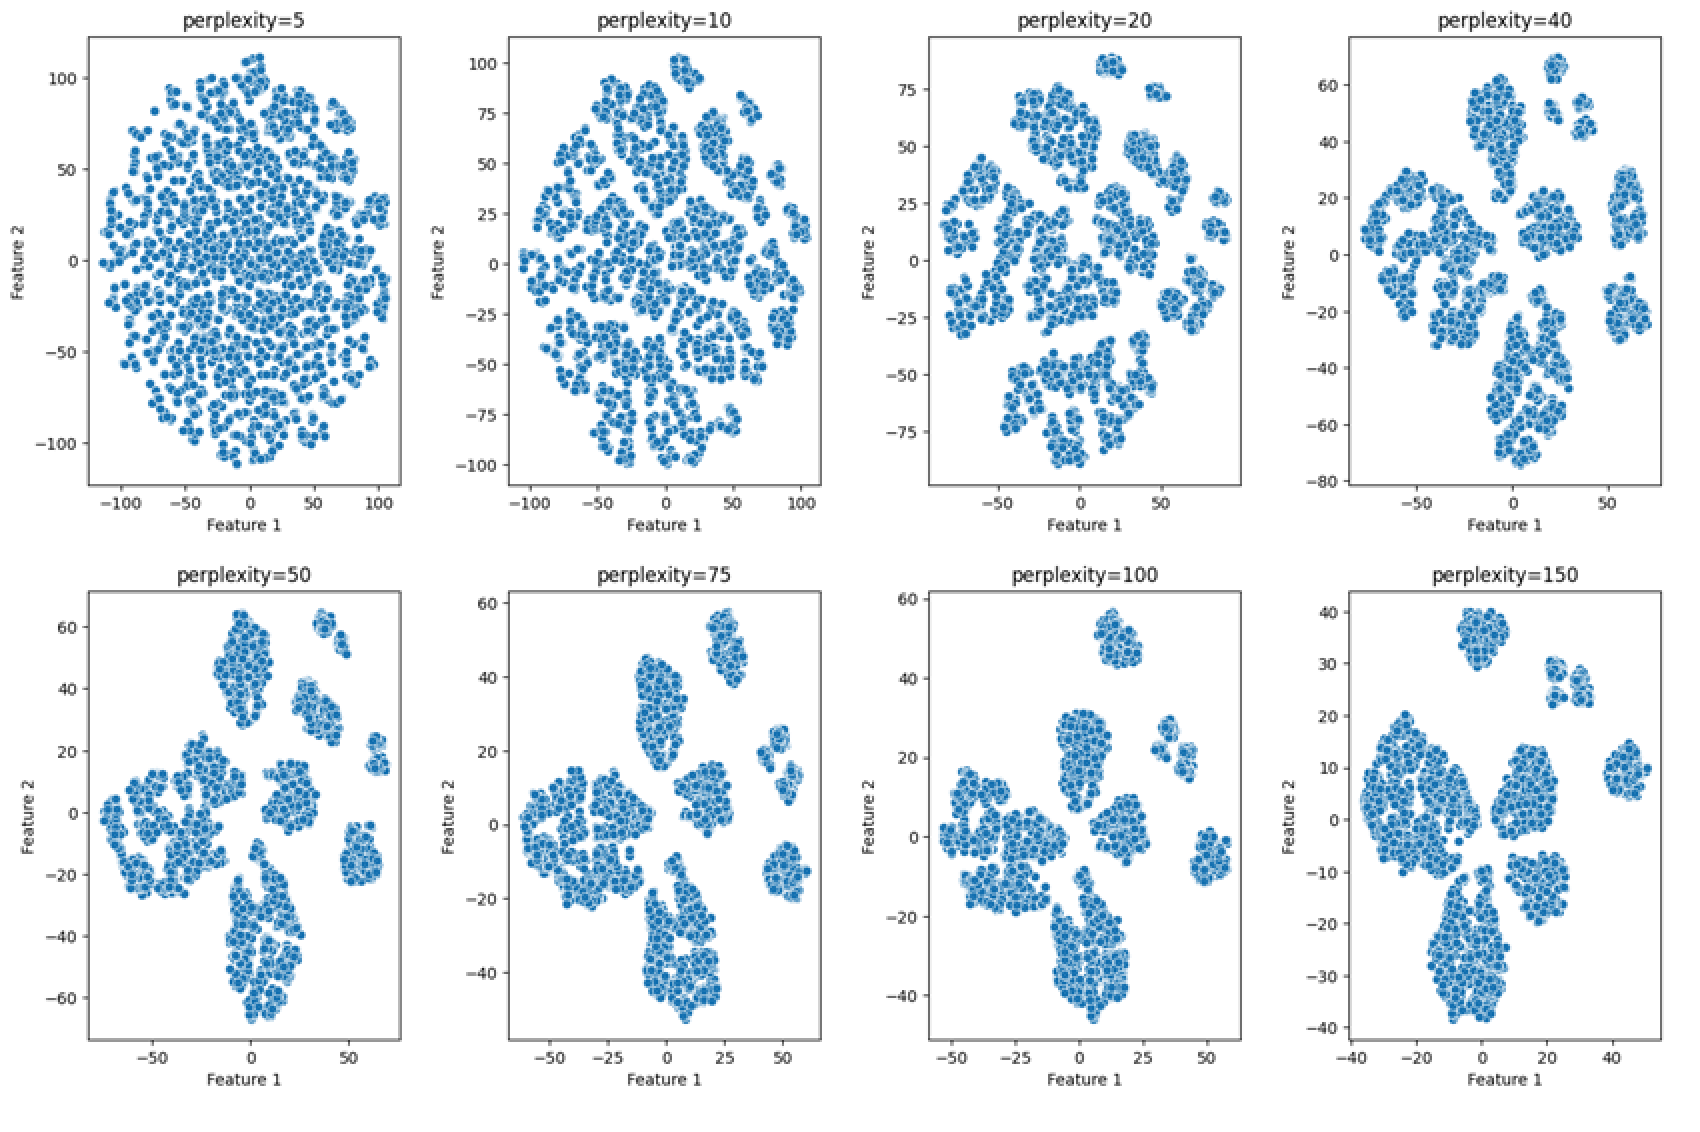

**---> NOTE: DO NOT DOUBLE-CLICK ON THE IMAGE ABOVE <---**
* It will open up a massive encrypted file

* I will choose to move forward with perpexity=100 as it provides (in my opinion) the most distinct and well separated clusters, approximately 6-8 clusters are present and we will explore that with K-means.


### 3-dimensional t-SNE analysis

* Moving forward with perplexity=100 for 3-dimensional analysis




In [ ]:
# Initiate the TSNE object and set output dimension to 3
# n_jobs=-2 specifies to use all but one core for parallel computation, which speeds up the process
tsne3 = TSNE(n_components=3, perplexity=100, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
tsne3_reduced_data = tsne3.fit_transform(scaled_cap_data)

# Creating a DataFrame from the reduced data
tsne_3d_data = pd.DataFrame(tsne3_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"])) # This DataFrame will have three columns corresponding to the three reduced dimensions

In [ ]:
# plotting the 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3', size_max=1, opacity=0.1)
fig.show()

- The data seems to exhibit a very good visual separation for perplexity=100 in three dimensions and I can about 7 clusters in it


### K-Means Clustering

* Starting with K=7 and will iterate through different values

Kmeans_4: KMeans(n_clusters=4, random_state=42)
WCSS for Kmeans_4: 38514.885616877065
Silhouette score for K=4 is 0.15972028622769466


Kmeans_5: KMeans(n_clusters=5, random_state=42)
WCSS for Kmeans_5: 34759.219838797166
Silhouette score for K=5 is 0.16511561005196781


Kmeans_6: KMeans(n_clusters=6, random_state=42)
WCSS for Kmeans_6: 32152.078765705384
Silhouette score for K=6 is 0.16373673922073761


Kmeans_7: KMeans(n_clusters=7, random_state=42)
WCSS for Kmeans_7: 30604.930210696337
Silhouette score for K=7 is 0.16273998001654494




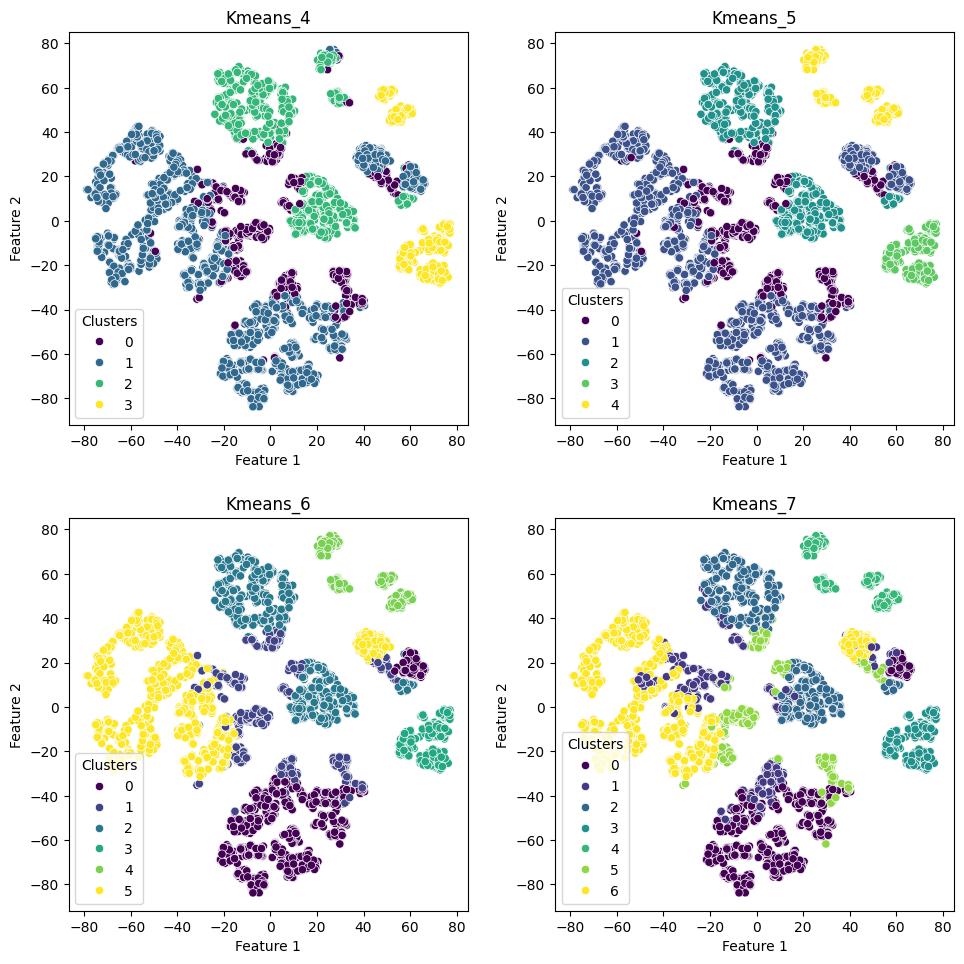

In [ ]:
# create the K-means object
n_clusters_range = range(4,8,1)

# Create a dictionary to store K-means objects
kmeans_objects = {}

# create a figure for hosting subplots
plt.figure(figsize=(10, 10))

# create index for subplot locations
subLoc = 1

# Loop through the range, create K-means objects
# calculate the WCSS (Within-Cluster Sum of Squares) and Silhoutte Scores
# for each K-means value and print the information/scatterplot

for i in n_clusters_range:
    kmeans_name = f"Kmeans_{i}"

    kmeans_objects[kmeans_name] = KMeans(n_clusters=i, random_state=RS)
    kmeans_objects[kmeans_name].fit(scaled_cap_data)
    kmeans_label_att = kmeans_objects[kmeans_name].labels_
    sil_score = silhouette_score(scaled_cap_data, kmeans_label_att)
    print(f"{kmeans_name}: {kmeans_objects[kmeans_name]}")
    print(f"WCSS for {kmeans_name}: {kmeans_objects[kmeans_name].inertia_}")
    print(f"Silhouette score for K={i} is {sil_score}")
    print("\n")

     # Adjust the subplot grid to 3x2
    plt.subplot(2, 2, subLoc)

    # Assigning the current cluster labels to the tsne_2d_data DataFrame
    tsne_2d_cap_data['Clusters'] = kmeans_objects[kmeans_name].labels_

    plt.title(kmeans_name)    # set plot title
    sns.scatterplot(tsne_2d_cap_data, x='Feature 1', y='Feature 2', hue='Clusters', palette="viridis");
    plt.tight_layout(pad=2)
    subLoc = subLoc + 1

### Find Optimal K with WCSS Elbow Method and Silhouette Method

WCSS Elbow Method

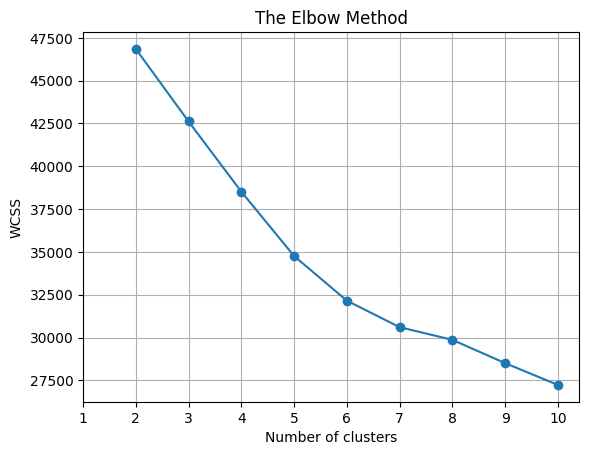

In [ ]:
# calculate WCSS for a range of K values
wcss_list = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 11):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(scaled_cap_data)

    # Append the inertia (WCSS) to the wcss_list
    wcss_list.append(clusterer.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(2, 11), wcss_list, marker='o')
plt.title('The Elbow Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('WCSS')  # Label the y-axis
plt.xticks(range(1, 11))  # Set the x-ticks from 1 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

Silhouette Method

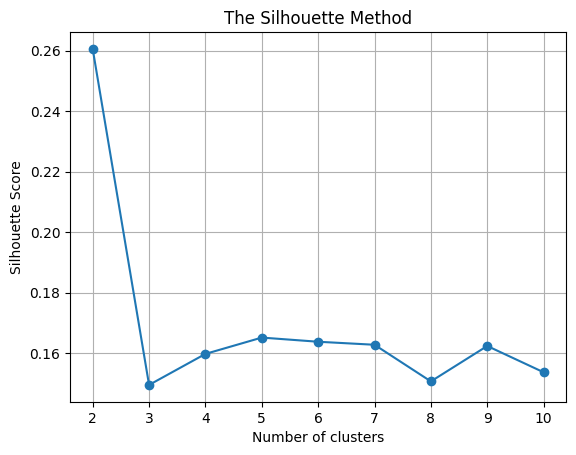

In [ ]:
# calculate Silhouette Scores for a range of K values
sil_score = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 11):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(scaled_cap_data)

    # Calculate Silhouette Score
    score = silhouette_score(scaled_cap_data, clusterer.labels_)

    # Append the Silhouette Score to the sil_score list
    sil_score.append(score)

# Plot the Silhouette Scores against the number of clusters
plt.plot(range(2, 11), sil_score, marker='o')
plt.title('The Silhouette Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('Silhouette Score')  # Label the y-axis
plt.xticks(range(2, 11))  # Set the x-ticks from 2 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

### 3D Analysis

In [ ]:
tsne_3d_data['Clusters'] = kmeans_objects['Kmeans_5'].labels_
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters', opacity=.1)
fig.show()

### Cluster Profiling and Conclusion

* Note: we are using the slimCapData: data that had 'ID', 'Experience', and 'ZIPCode' removed and 'Income','CCAvg', and 'Mortgage' capped at 95%

In [ ]:
# Add the cluster labels back to the DataFrame
slimCapData['Clusters'] = kmeans_objects['Kmeans_5'].labels_

# Display the slimData DataFrame with original values
slimCapData.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  Clusters  
0                   1           0       0           0         1  
1                   1           0       0           0         1  
2                   0           0       0           0         1  
3                   0           0       0           0         0  
4                   0           0       0           1         2

Clusters
1    50.06
2    20.74
0    16.36
3     6.80
4     6.04
Name: proportion, dtype: float64 



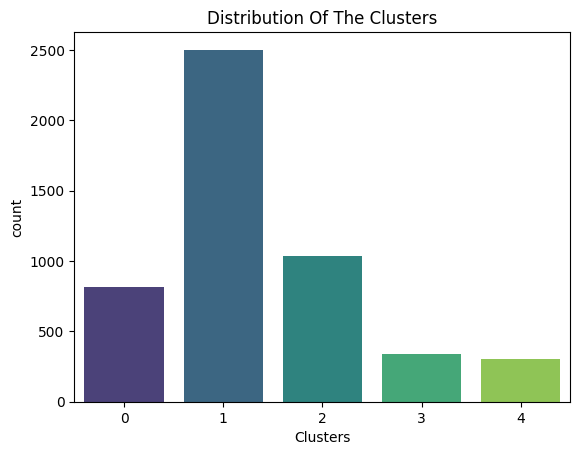

In [ ]:
# checking the distribution of the categories in Clusters
print(100*slimCapData['Clusters'].value_counts(normalize=True), '\n')

# plotting the count plot for clusters
sns.countplot(slimCapData, x='Clusters', palette='viridis').set_title("Distribution Of The Clusters");

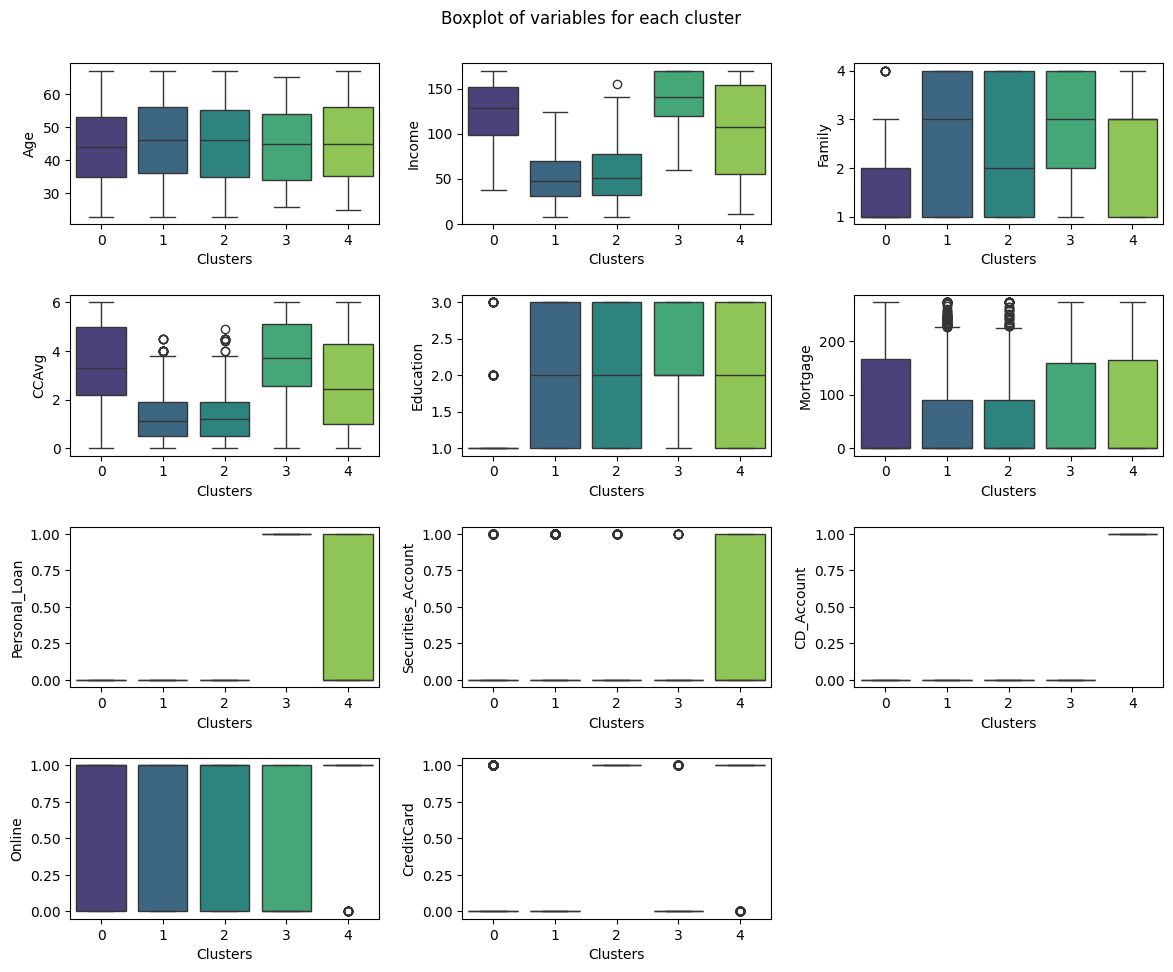

In [ ]:
# Prepare for plotting boxplots of numerical variables for each cluster
plt.figure(figsize=(12, 10))  # Set the figure size for the plot
plt.suptitle("Boxplot of variables for each cluster")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(slimCapData.columns.to_list()[:-1]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(slimCapData, x="Clusters", y=variable, palette='viridis')  # Create a boxplot for current variable and cluster

# Adjust layout of subplots to improve spacing
plt.tight_layout(pad=2.0)

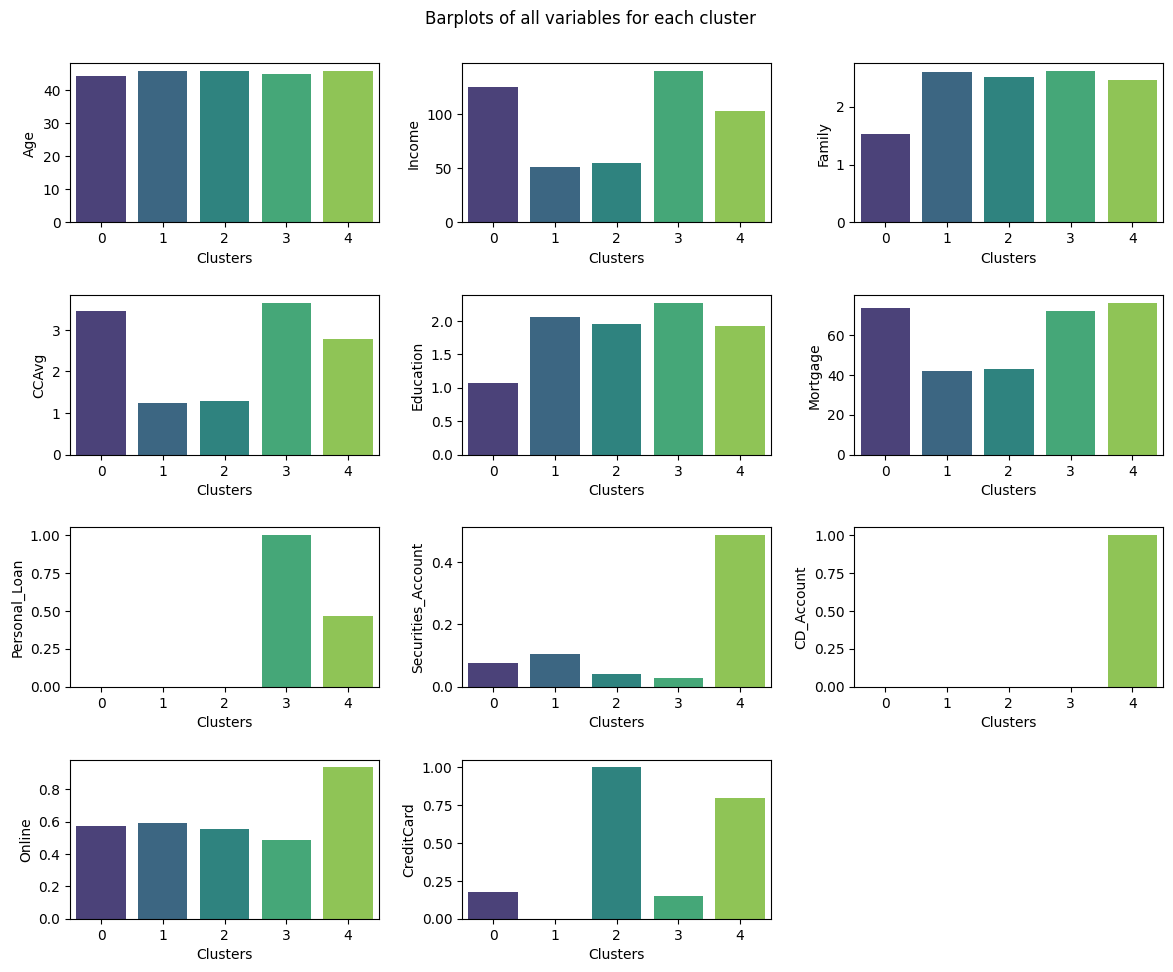

In [ ]:
# Prepare for plotting barplots of numerical variables for each cluster
plt.figure(figsize=(12, 10))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot

for i, variable in enumerate(slimCapData.columns.to_list()[:-1]):
    plt.subplot(4, 3, i + 1)
    sns.barplot(data=slimCapData, x="Clusters", y=variable, palette='viridis', errorbar=None)

plt.tight_layout(pad=2.0)

**Visual Analysis of Scatterplots**
* K=5 shows well-separated, cohesive clusters with good visual distinction. Even where large clusters are divided, the line of division is clear and appears to indicate a pattern between gaps as the division seems to continute in an orderly way from one cluster to another. As K increases however, so does fragmentation. The visual patterns which existed at K=5 begin to break down. Large clusters begin to lose clearly defined boundaries and become scattered messes of three or more colors.

**Elbow Method Analysis**
* The WCSS curve shows a gradual decrease without a sharp "elbow." However, there's a slight bend around K=4 to K=5, where the rate of decrease starts to level off.

**Silhouette Method**
* The silhouette scores are all relatively low (ideally >0.5), but K=5 clearly performs best.

**Recommendation: K=5**
* The highest silhouette score (0.17) indicates the best internal cluster quality; visuall the K=5 plot shows the most natural-looking cluster boundaries; 5 segments are manageable for marketing campaigns and align well with typical banking personas (e.g., high-value customers, young professionals, families, conservative savers). The relatively low silhouette scores across all K values suggest the customer data has some natural overlap, which is realistic for banking customers who often share multiple characteristics. K=5 provides the best balance of statistical validity and business practicality for the loan targeting campaign.

**Practical Business Implications**
The cluster profiling revealed that there is little distinction between loan-taking customers and non-loan customers across the demographic and behavioral variables available in the dataset.

## Model Performance Comparison and Final Model Selection

**Final Model Selection: Post-pruning Decision Tree**

**Cluster model:** The post K-means profiling analysis showed the clusters provided little distinction between loan-taking customers and non-loan customers across the demographic and behavioral variables available in the dataset. This eliminated this model.

**Pre-pruning vs Post-pruning Decision Trees:**

* Accuracy: Pre-pruning: 98.6% --- Post-pruning: 99.0%
* Recall: Pre-pruning: 91.4% --- Post-Pruning: 92.4%
* Precision: Pre-pruning: 95.0% --- Post-Pruning: 97.8%
* F1:Pre-pruning: 93.2% --- Post-Pruning: 95.1%

The post pruning model proved superior in all measures.

**Feature Importance**

1. Income
* Primary split at 113.5k in the root node separates the dataset into two major branches. Secondary splits occur at the depth=2 at 116.5k, 106.5k, 89k, and 82.5k. Business insight: is the strongest predictor of loan acceptance.


2. Credit Card Average Spending (CCAvg)
* For those making less than \$113,500, CCAvg is the next most important feature with a critical threshold at \$2,950. Business Insight: Higher spending indicates financial capacity and loan need

3. Education Level
* For those making more than \$113,500 education is the most important feature with the split occuring at 1.5 (separating Undergraduate from Graduate/Professional).
Business Insight: Education level correlates with loan acceptance, especially at high income levels

4. Family Size
* Key thresholds at 2.5 and 3.5 members. Business Insight: Larger families have higher loan acceptance rates, likely due to increased financial needs.

5. CD Account Ownership
* Business Insight: CD account holders show higher loan propensity, indicating existing investment behavior

6. Age
* Splits at 43.5, 57.0, and 57.5 years. Business Insight: Middle-aged customers (44-57) show highest loan acceptance rates



## Actionable Insights and Business Recommendations


#### **Marketing Team Recommendations & Campaign Strategy**

**Primary Target Segments (296 customers, 100% Acceptance Rate in model)**
* Premium Professionals: Income > \$116,500 + Graduate/Professional degree
 * Campaign: Emphasis "Premium" loan products with competitive rates
 * Messaging: "Exclusive financing for accomplished professionals"
 * Volume: 237 customers identified
* Affluent Families: Income > \$113,500 + Undergraduate education + Family size > 2.5
 * Campaign: Family-focused loan products (home improvement, education)
 * Messaging: "Support your family's goals with flexible financing"
 * Volume: 59 customers identified

**Secondary Target Segments High-Probability Prospects (70-100% Acceptance Rate)**
* Active Investors: CCAvg >$2,950 + CD Account holders
 * Campaign: Investment-linked loan products
 * Messaging: "Leverage your investments for strategic financing"
* High-Spending Families: Moderate income + High CC spending + Large families + Non-online users
 * Campaign: Traditional marketing channels (mail, phone, in-store)
 * Messaging: "Consolidate and optimize your family's finances"

**Execution Strategy**
* Phase 1: Tier 1 Precision Targeting (Weeks 1-2)
 * Personal banker outreach with premium loan offers

* Phase 2: Tier 2 Expanded Outreach (Weeks 3-4)
 * Multi-channel approach (digital for online users, traditional for non-online)

* Phase 3: Ongoing refinment and optimization
 * Monitor model vs actual performance, refine messaging and targeting criteria accordingly. Retrain model quarterly.

**Key Marketing Insights**
* Quality over Quantity: Focus on the 9.7% of customers identified as high-probability rather than broad campaigns
Income-First Strategy: Use \$113,500 as the primary qualification threshold
* Life Stage Targeting: Prioritize families with 3+ members and professionals aged 44-57
* Behavioral Indicators: High credit card spending (>\$2,950/month) strongly predicts loan interest
* Product Positioning: Tailor loan products to segment needs (family loans, professional financing, investment leverage)
* Expect higher than 9% historical baseline conversion rates (potentially target 18%)
* Focus on ~500 high-probability prospects rather than entire customer base
* Model with 97.8% precision means minimal wasted marketing spend and reduced marketing costs

**Bottom Line**
* This data-driven approach transforms loan marketing from broad, expensive campaigns to precision targeting of customers who are statistically proven to accept loan offers, dramatically improving both efficiency and profitability.

___